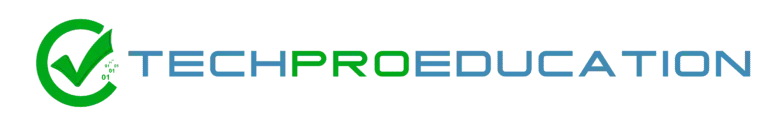

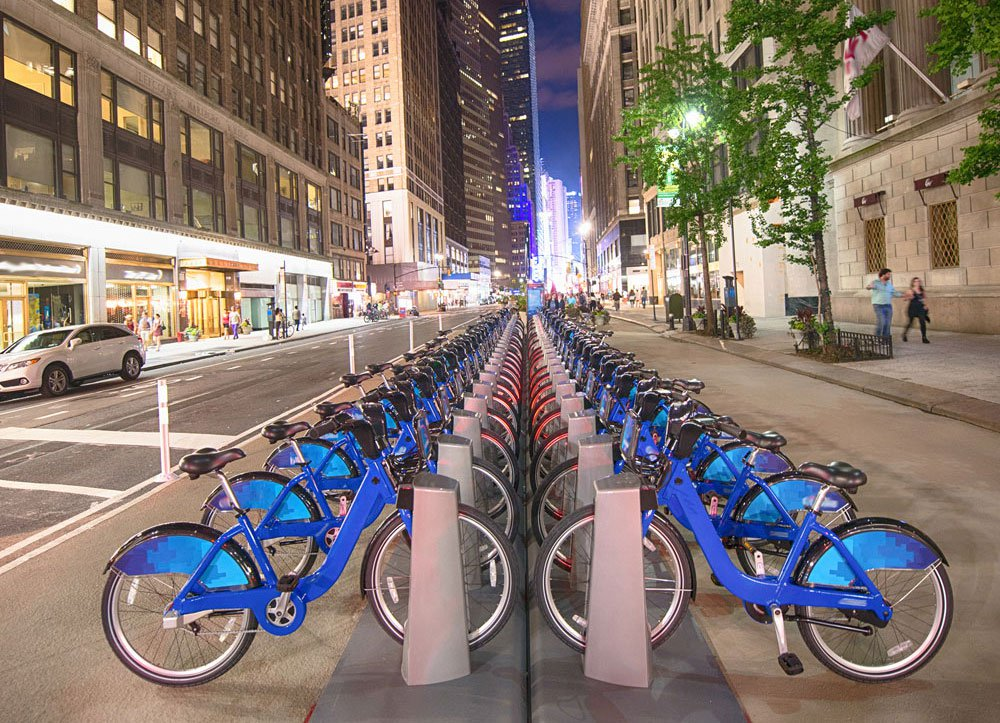

# WELCOME!

Welcome to ***"Demand Prediction Project"***. This is the third capstone project.
As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

In this project, the goal is to predict the number of future bike shares given the historical data of London bike shares. So this case should be handled as a time series problem with ***Bidirectional LSTM***. 

In order to achieve this goal, you will make predictions with LSTM, unlike the machine learning algorithms you have applied before. Long short term memory (LSTM) is an artificial repetitive neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback links. It can process not only single data points but also entire data series. 

Before diving into the project, please take a look at the Determines and Tasks.

- **NOTE:** This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind LSTM.



Welcome to the "Demand Forecasting Project." This is the third capstone project. As you know, recently, urban areas have provided free or affordable access to bicycles as an alternative to motorized public transportation or private vehicles for short-distance travel. This aims to reduce traffic congestion, noise, and air pollution.

In this project, the goal is to predict the number of future bike shares based on the history of bike sharing in London. This will be addressed as a time series problem using Bidirectional LSTM.

To achieve this objective, you will make predictions using LSTM, unlike the machine learning algorithms you have applied previously. Long Short-Term Memory (LSTM) is a type of artificial recurrent neural network architecture used in deep learning. Unlike standard feedforward neural networks, LSTMs have feedback connections. They can process not just single data points but entire data sequences.

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.


- ***Note:*** *What you can do in this project is more than what is asked of you.*


- **timestamp** - a timestamp field for grouping the data
- **cnt** - the number of new bike shares
- **t1** - actual temperature (°C)
- **t2** - "feels like" temperature (°C)
- **hum** - humidity (%)
- **wind_speed** - wind speed (km/h)
- **weather_code** - weather condition category
- **is_holiday** - boolean field - 1 if it's a holiday / 0 if it's not a holiday
- **is_weekend** - boolean field - 1 if the day is a weekend
- **season** - meteorological season category: 0-spring; 1-summer; 2-autumn; 3-winter.

# #Tasks

#### 1. Exploratory Data Analysis

- Check Missing Values and Outliers
- Plot Breakdowns of Data

    *i.  Plot bike shares over time*
    
    *ii.  Plot bike shares by months*
    
    *iii. Plot bike shares by hours*
    
    *iv. Plot bike shares by day of week*
    
    *v. Plot the distribution of bike shares on holidays by seasons*
    
- Drop unnecessary columns
    
#### 2. Data Pre-Processing

- Train - Test Split
- Scaling
- Define a Function for Creating Time Steps

#### 3. Model Building with LSTM

- Create, Compile and Fit Bidirectional LSTM Model
- Plot Train and Validation Losses

#### 4. Evaluate on Test Data

- Inverse Transform
- Plot Prediction

#### 5. Retrain and Forecasting

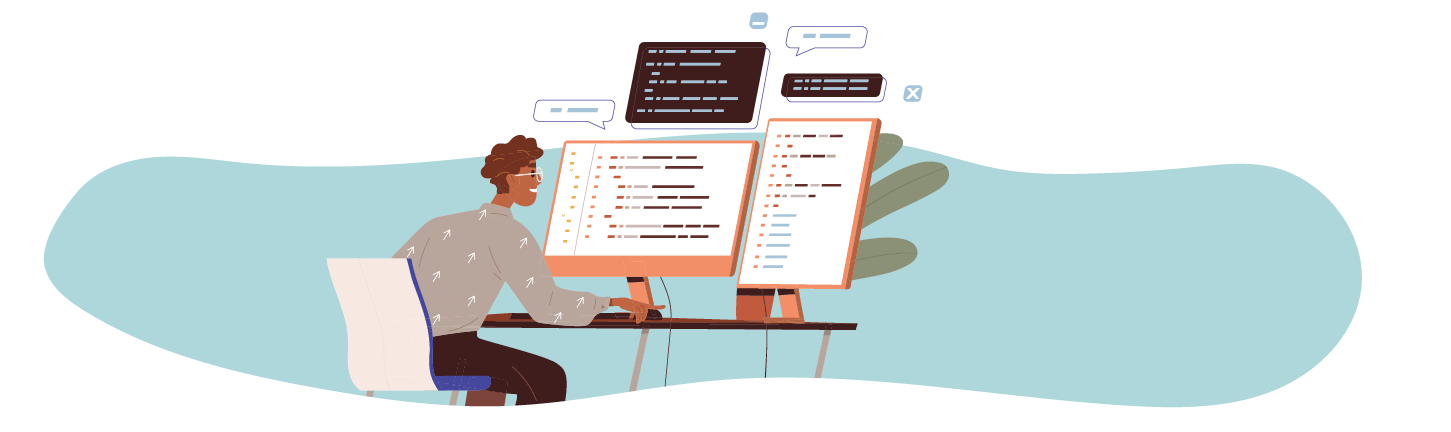

## Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("store_sharing.csv")

In [3]:
df

timestamp   cnt    t1    t2     hum  wind_speed  \
0      2015-01-04 00:00:00   182 3.000 2.000  93.000       6.000   
1      2015-01-04 01:00:00   138 3.000 2.500  93.000       5.000   
2      2015-01-04 02:00:00   134 2.500 2.500  96.500       0.000   
3      2015-01-04 03:00:00    72 2.000 2.000 100.000       0.000   
4      2015-01-04 04:00:00    47 2.000 0.000  93.000       6.500   
...                    ...   ...   ...   ...     ...         ...   
17409  2017-01-03 19:00:00  1042 5.000 1.000  81.000      19.000   
17410  2017-01-03 20:00:00   541 5.000 1.000  81.000      21.000   
17411  2017-01-03 21:00:00   337 5.500 1.500  78.500      24.000   
17412  2017-01-03 22:00:00   224 5.500 1.500  76.000      23.000   
17413  2017-01-03 23:00:00   139 5.000 1.000  76.000      22.000   

       weather_code  is_holiday  is_weekend  season  
0             3.000       0.000       1.000   3.000  
1             1.000       0.000       1.000   3.000  
2             1.000       0.000       1.000   3.000  
3             1.000       0.000       1.000   3.000  
4             1.000       0.000       1.000   3.000  
...             ...         ...         ...     ...  
17409         3.000       0.000       0.000   3.000  
17410         4.000       0.000       0.000   3.000  
17411         4.000       0.000       0.000   3.000  
17412         4.000       0.000       0.000   3.000  
17413         2.000       0.000       0.000   3.000  

[17414 rows x 10 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
df = pd.read_csv("store_sharing.csv", parse_dates=['timestamp'])

If the argument `parse_dates=['timestamp']` is not used, and the code is run as `df = pd.read_csv("store_sharing.csv")`, the "timestamp" column will by default be read as a string and treated as a regular column.

In [6]:
df

timestamp   cnt    t1    t2     hum  wind_speed  weather_code  \
0     2015-01-04 00:00:00   182 3.000 2.000  93.000       6.000         3.000   
1     2015-01-04 01:00:00   138 3.000 2.500  93.000       5.000         1.000   
2     2015-01-04 02:00:00   134 2.500 2.500  96.500       0.000         1.000   
3     2015-01-04 03:00:00    72 2.000 2.000 100.000       0.000         1.000   
4     2015-01-04 04:00:00    47 2.000 0.000  93.000       6.500         1.000   
...                   ...   ...   ...   ...     ...         ...           ...   
17409 2017-01-03 19:00:00  1042 5.000 1.000  81.000      19.000         3.000   
17410 2017-01-03 20:00:00   541 5.000 1.000  81.000      21.000         4.000   
17411 2017-01-03 21:00:00   337 5.500 1.500  78.500      24.000         4.000   
17412 2017-01-03 22:00:00   224 5.500 1.500  76.000      23.000         4.000   
17413 2017-01-03 23:00:00   139 5.000 1.000  76.000      22.000         2.000   

       is_holiday  is_weekend  season  
0           0.000       1.000   3.000  
1           0.000       1.000   3.000  
2           0.000       1.000   3.000  
3           0.000       1.000   3.000  
4           0.000       1.000   3.000  
...           ...         ...     ...  
17409       0.000       0.000   3.000  
17410       0.000       0.000   3.000  
17411       0.000       0.000   3.000  
17412       0.000       0.000   3.000  
17413       0.000       0.000   3.000  

[17414 rows x 10 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [8]:
df = pd.read_csv("store_sharing.csv", parse_dates=['timestamp'], index_col="timestamp")

We used the "parse_dates" and "index_col" parameters to directly set our data as an index and ensure that its type is datetime. If we didn't apply "parse_dates", the "Datetime" wouldn't be set as an index, and this feature would be defined as an object.

When we specify the "timestamp" column as the index of the dataset using the `index_col="timestamp"` statement, each row in the DataFrame is uniquely identified by a timestamp. In this case, the "timestamp" column acts as a unique identifier separating each row.

Some of the benefits include:

- **Fast Access**: You can quickly access rows associated with a specific timestamp in the DataFrame. Time-based indexing makes operations like selecting data within a specific date range or examining events at a particular time much easier.
  
- **Time Series Analysis**: Working with time series data often requires sorting and analyzing data by time. By setting the timestamp as the index, you can apply various techniques for time series analysis, such as identifying trends, seasonality, or changes over time.
  
- **Data Acceleration**: Indexing the dataset by a timestamp can speed up queries. Indexed data allows for faster access to rows related to a particular timestamp, enhancing performance when working with large datasets.
  
- **Plotting and Visualization**: When indexed by timestamps, the DataFrame can be directly fed into plotting and visualization tools. This makes it easier to understand the data through visual representations, such as graphs showing time-based trends or analyses of changes over time.

In summary, setting the timestamp as the index is an important step when working with time series data, enabling more effective data access, analysis, and visualization.

In [9]:
df

cnt    t1    t2     hum  wind_speed  weather_code  \
timestamp                                                                 
2015-01-04 00:00:00   182 3.000 2.000  93.000       6.000         3.000   
2015-01-04 01:00:00   138 3.000 2.500  93.000       5.000         1.000   
2015-01-04 02:00:00   134 2.500 2.500  96.500       0.000         1.000   
2015-01-04 03:00:00    72 2.000 2.000 100.000       0.000         1.000   
2015-01-04 04:00:00    47 2.000 0.000  93.000       6.500         1.000   
...                   ...   ...   ...     ...         ...           ...   
2017-01-03 19:00:00  1042 5.000 1.000  81.000      19.000         3.000   
2017-01-03 20:00:00   541 5.000 1.000  81.000      21.000         4.000   
2017-01-03 21:00:00   337 5.500 1.500  78.500      24.000         4.000   
2017-01-03 22:00:00   224 5.500 1.500  76.000      23.000         4.000   
2017-01-03 23:00:00   139 5.000 1.000  76.000      22.000         2.000   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00       0.000       1.000   3.000  
2015-01-04 01:00:00       0.000       1.000   3.000  
2015-01-04 02:00:00       0.000       1.000   3.000  
2015-01-04 03:00:00       0.000       1.000   3.000  
2015-01-04 04:00:00       0.000       1.000   3.000  
...                         ...         ...     ...  
2017-01-03 19:00:00       0.000       0.000   3.000  
2017-01-03 20:00:00       0.000       0.000   3.000  
2017-01-03 21:00:00       0.000       0.000   3.000  
2017-01-03 22:00:00       0.000       0.000   3.000  
2017-01-03 23:00:00       0.000       0.000   3.000  

[17414 rows x 9 columns]

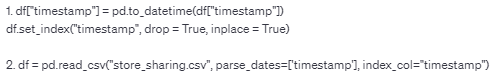

Both approaches read the "store_sharing.csv" file, create a DataFrame, and set the "timestamp" column as a datetime type and index.

- `df["timestamp"] = pd.to_datetime(df["timestamp"])`: Converts the "timestamp" column to a datetime type using the `pd.to_datetime()` function.
  
- `df.set_index("timestamp", drop=True, inplace=True)`: Sets the "timestamp" column as the index of the DataFrame.

- `df = pd.read_csv("store_sharing.csv", parse_dates=['timestamp'], index_col="timestamp")`: Reads the "store_sharing.csv" file, converts the "timestamp" column to a datetime type using the `parse_dates` parameter, and sets it as the index of the DataFrame.

Both methods reorganize the DataFrame to use the "timestamp" column as the index.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


We can see that all of our data consists of numerical values, and there are no null values in the dataset.

---
---

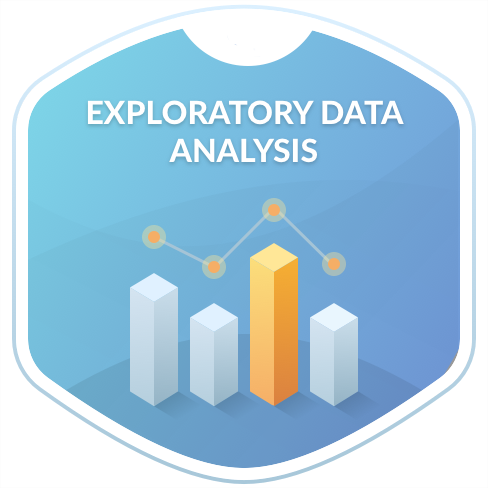

## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

### Check Missing Values and Outliers

In [11]:
df.isnull().sum()

cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [12]:
df.describe().T

count     mean      std    min     25%     50%      75%  \
cnt          17414.000 1143.102 1085.108  0.000 257.000 844.000 1671.750   
t1           17414.000   12.468    5.572 -1.500   8.000  12.500   16.000   
t2           17414.000   11.521    6.615 -6.000   6.000  12.500   16.000   
hum          17414.000   72.325   14.313 20.500  63.000  74.500   83.000   
wind_speed   17414.000   15.913    7.895  0.000  10.000  15.000   20.500   
weather_code 17414.000    2.723    2.341  1.000   1.000   2.000    3.000   
is_holiday   17414.000    0.022    0.147  0.000   0.000   0.000    0.000   
is_weekend   17414.000    0.285    0.452  0.000   0.000   0.000    1.000   
season       17414.000    1.492    1.119  0.000   0.000   1.000    2.000   

                  max  
cnt          7860.000  
t1             34.000  
t2             34.000  
hum           100.000  
wind_speed     56.500  
weather_code   26.000  
is_holiday      1.000  
is_weekend      1.000  
season          3.000

Deep Learning de Outlier ların, Machine Learning de olduğu kadar önemi bulunmamaktadır!

### Plot Breakdowns of Data

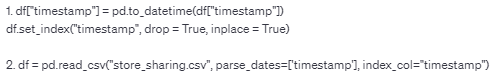

Since we set our data to the index, we can derive different features from it. If it hadn't been set as the index, we could have used the `to_datetime` function to extract the desired features. We processed the date column this way to make the analysis easier for us.

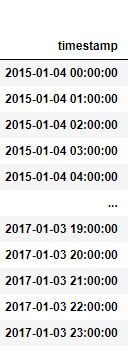

In [13]:
df["year"] = df.index.year
df['month'] = df.index.month 
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['hour'] = df.index.hour 
df["date"] = df.index.date

We can see that the new features are added to the end of the DataFrame.

In [14]:
df.sample(7)

cnt     t1     t2    hum  wind_speed  weather_code  \
timestamp                                                                  
2016-01-13 12:00:00   919  6.500  3.500 63.500      17.000         1.000   
2016-07-03 21:00:00   939 17.500 17.500 68.500      12.000         1.000   
2016-02-06 06:00:00    94 11.000 11.000 77.000      20.500         3.000   
2016-04-25 02:00:00    36  8.000  5.000 76.000      15.000         2.000   
2016-02-20 15:00:00   423 11.000 11.000 94.000      31.000         7.000   
2015-09-11 14:00:00  1604 20.000 20.000 53.000      25.000         1.000   
2016-05-15 21:00:00   872 13.000 13.000 72.000      24.000         1.000   

                     is_holiday  is_weekend  season  year  month  day  \
timestamp                                                               
2016-01-13 12:00:00       0.000       0.000   3.000  2016      1   13   
2016-07-03 21:00:00       0.000       1.000   1.000  2016      7    3   
2016-02-06 06:00:00       0.000       1.000   3.000  2016      2    6   
2016-04-25 02:00:00       0.000       0.000   0.000  2016      4   25   
2016-02-20 15:00:00       0.000       1.000   3.000  2016      2   20   
2015-09-11 14:00:00       0.000       0.000   2.000  2015      9   11   
2016-05-15 21:00:00       0.000       1.000   0.000  2016      5   15   

                     dayofweek  hour        date  
timestamp                                         
2016-01-13 12:00:00          2    12  2016-01-13  
2016-07-03 21:00:00          6    21  2016-07-03  
2016-02-06 06:00:00          5     6  2016-02-06  
2016-04-25 02:00:00          0     2  2016-04-25  
2016-02-20 15:00:00          5    15  2016-02-20  
2015-09-11 14:00:00          4    14  2015-09-11  
2016-05-15 21:00:00          6    21  2016-05-15

We changed the seasons to strings so that it's clear what they represent, and we added them to the end of the DataFrame so that we can clearly see what those numbers correspond to.

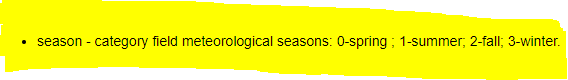

In [15]:
df['season_name'] = df['season'].replace({0:"Spring", 1:"Summer", 2:"Autumn", 3:"Winter"})

In [16]:
df.head()

cnt    t1    t2     hum  wind_speed  weather_code  \
timestamp                                                                
2015-01-04 00:00:00  182 3.000 2.000  93.000       6.000         3.000   
2015-01-04 01:00:00  138 3.000 2.500  93.000       5.000         1.000   
2015-01-04 02:00:00  134 2.500 2.500  96.500       0.000         1.000   
2015-01-04 03:00:00   72 2.000 2.000 100.000       0.000         1.000   
2015-01-04 04:00:00   47 2.000 0.000  93.000       6.500         1.000   

                     is_holiday  is_weekend  season  year  month  day  \
timestamp                                                               
2015-01-04 00:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 01:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 02:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 03:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 04:00:00       0.000       1.000   3.000  2015      1    4   

                     dayofweek  hour        date season_name  
timestamp                                                     
2015-01-04 00:00:00          6     0  2015-01-04      Winter  
2015-01-04 01:00:00          6     1  2015-01-04      Winter  
2015-01-04 02:00:00          6     2  2015-01-04      Winter  
2015-01-04 03:00:00          6     3  2015-01-04      Winter  
2015-01-04 04:00:00          6     4  2015-01-04      Winter

***i. Plot bike shares over time***

This code creates a line plot of the `cnt` (count) variable over time from the `df` DataFrame. The size of the graph is specified using the `figsize` parameter (15 units wide and 5 units tall). The `sns.lineplot()` function plots the data with time on the x-axis and the `cnt` values on the y-axis, representing the data as a line graph.

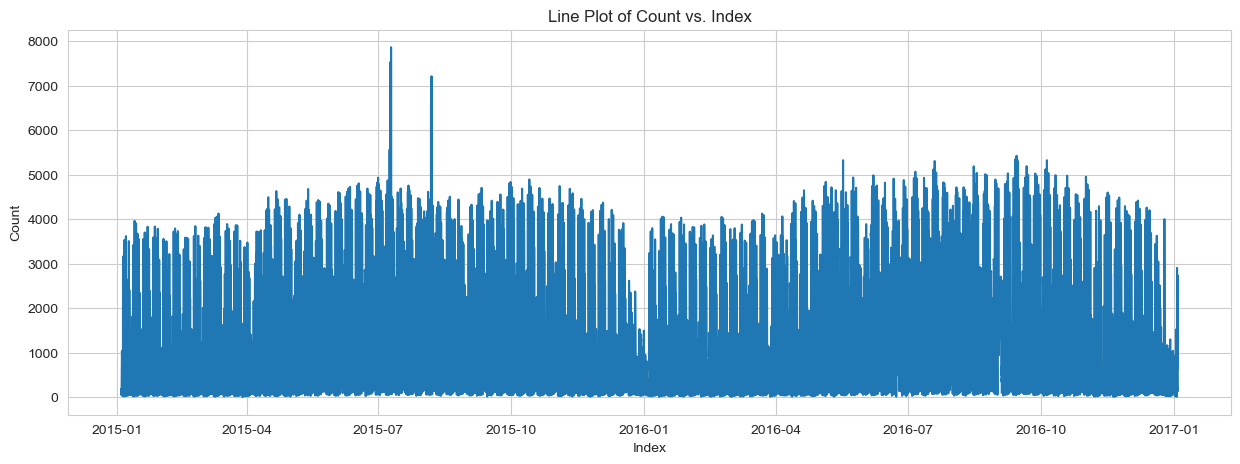

In [18]:
plt.figure(figsize=(15, 5))  # Set the figure size
sns.lineplot(x=df.index, y="cnt", data=df)  # Plot using Seaborn's lineplot function

plt.xlabel("Index")  # Set the x-axis label
plt.ylabel("Count")  # Set the y-axis label
plt.title("Line Plot of Count vs. Index")  # Set the plot title
plt.show()  # Display the plot

This code groups the `df` DataFrame by the `date` column and calculates the total daily `cnt` (count) values. As a result, we get the `date_cnt` series, which contains the total usage counts for each date. Next, the `plt.figure(figsize=(15,5))` command sets the size of the plot (15 units wide and 5 units tall). The `sns.lineplot()` function then creates a line plot with the dates on the x-axis and the total usage counts on the y-axis, visualizing the daily usage changes over time. This allows us to see how daily usage varies across time.

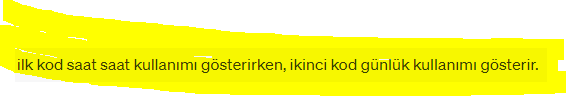

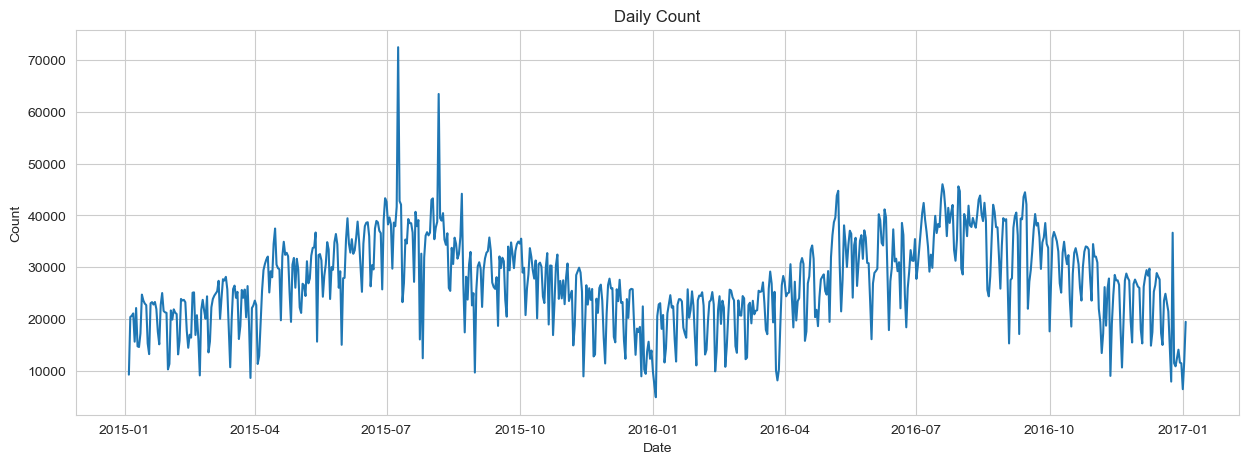

In [20]:
date_cnt = df.groupby("date")["cnt"].sum()

plt.figure(figsize=(15, 5))
sns.lineplot(x=date_cnt.index, y=date_cnt.values)

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Daily Count")
plt.show()

The `resample('M')` function converts the DataFrame into monthly periods, calculating the total usage for each month. This groups the usage by month and allows us to obtain the total usage values. The `sum()` operation computes the total usage for each month, creating a new DataFrame called `data_by_month`.

Next, the size of the graph is set using `plt.figure(figsize=(15,5))`. The `plt.xticks(rotation=90)` command ensures that the date labels on the x-axis are displayed vertically. A point plot is created using `sns.pointplot(x=data_by_month.index, y=data_by_month.cnt)`, where the months are placed on the x-axis and the total usage values for those months on the y-axis. This visualizes the change in usage by month.

In summary, we are transforming the data into monthly periods, calculating the total usage, and using a point plot to display the changes in usage by month.

***ii. Plot bike shares by months***

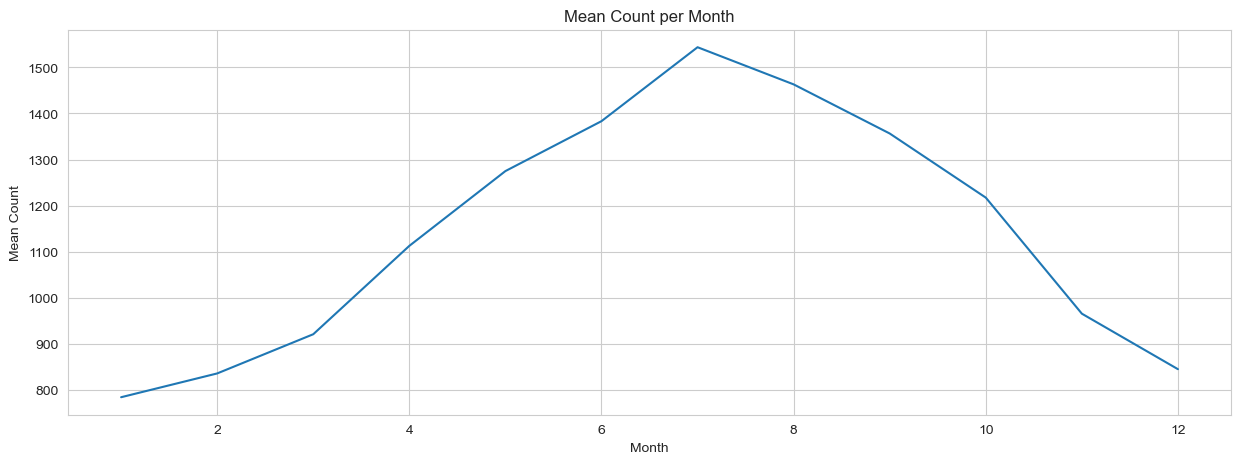

In [22]:
month_cnt = df.groupby("month")["cnt"].mean()

plt.figure(figsize=(15, 5))
sns.lineplot(x=month_cnt.index, y=month_cnt.values)

plt.xlabel("Month")
plt.ylabel("Mean Count")
plt.title("Mean Count per Month")

plt.show()

The `groupby("month")` function groups the DataFrame by month and calculates the average of the "cnt" (count) column using `mean()`. In this way, we obtain the average usage value for each month. A new DataFrame containing these values is created, named `month_cnt`.

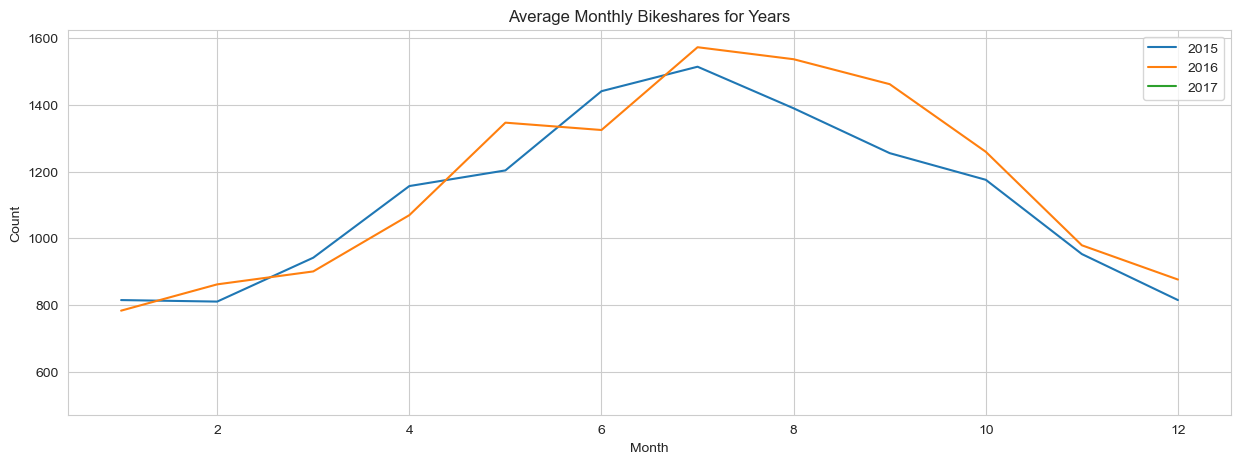

In [24]:
year_month_cnt = df.groupby(["year", "month"])["cnt"].mean()    

plt.figure(figsize=(15,5))        
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')
plt.show()

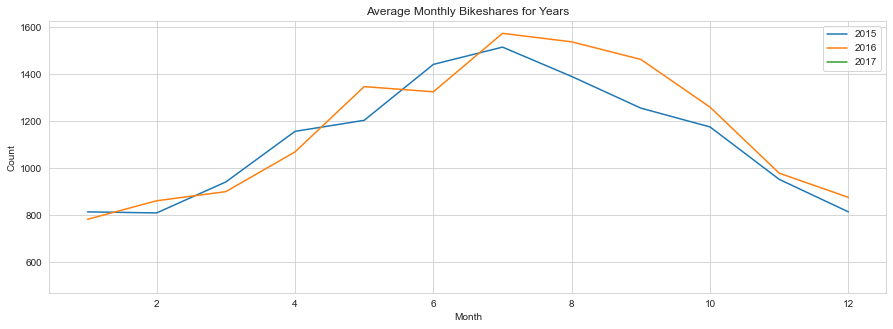

In [21]:
year_month_cnt = df.groupby(["year", "month"])["cnt"].mean()  

plt.figure(figsize=(15,5))       
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)

plt.legend()
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Average Monthly Bikeshares for Years')
plt.show()

By using `groupby(["year", "month"])`, the DataFrame is grouped by years and months, and the average of the "cnt" (count) column is calculated with `mean()`. This provides the average usage values for each month of each year. A new DataFrame, called `year_month_cnt`, is created to store these values.

Next, the size of the graph is set using `plt.figure(figsize=(15,5))`. The loop `for year in year_month_cnt.index.levels[0]:` iterates over each year, and with `plt.plot(year_month_cnt[year].index, year_month_cnt[year],label=year)`, a line plot is drawn for each year, showing the average monthly usage for that year. This visualization displays the monthly usage changes for each year and allows for a comparison between years.

In summary, by grouping the data by years and months, calculating the average usage for each month of each year, and plotting it as a line graph, we can analyze usage trends over the months and compare usage patterns across different years.

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

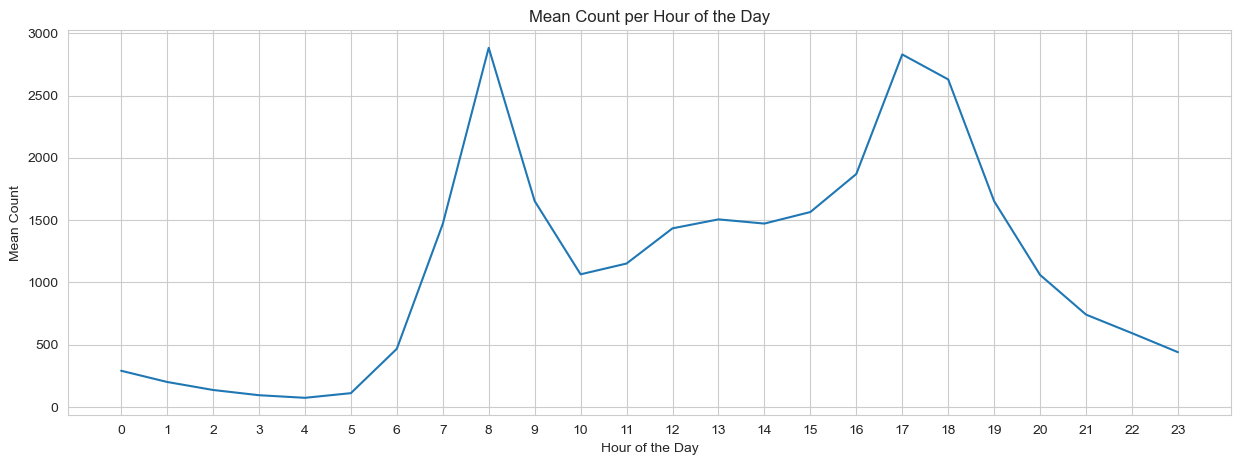

In [26]:
hour_cnt = df.groupby("hour")["cnt"].mean()

plt.figure(figsize=(15, 5))
plt.xticks(np.arange(24))
sns.lineplot(x=hour_cnt.index, y=hour_cnt.values)

plt.xlabel("Hour of the Day")
plt.ylabel("Mean Count")
plt.title("Mean Count per Hour of the Day")

plt.show()

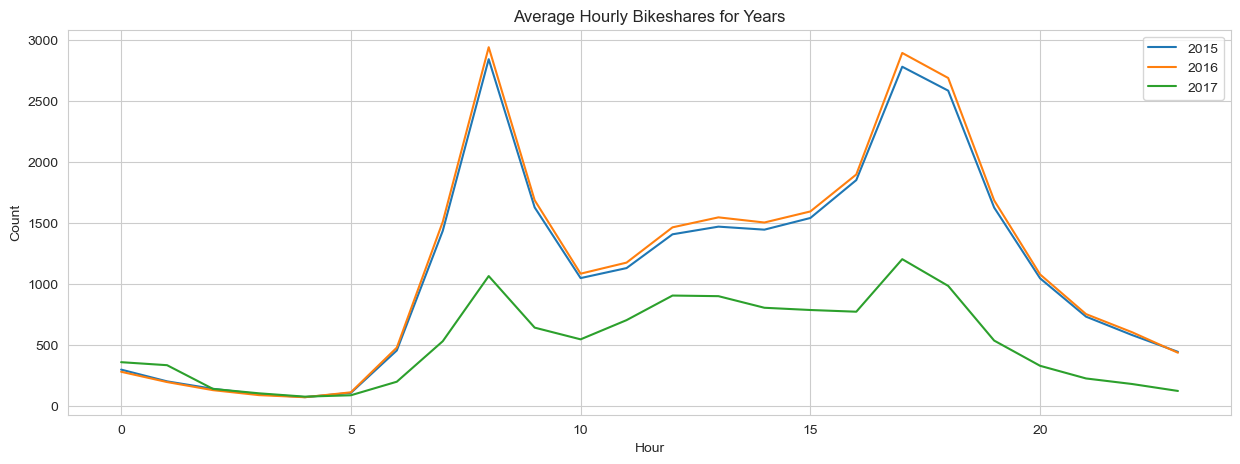

In [27]:
year_hour_cnt = df.groupby(["year", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for year in year_month_cnt.index.levels[0]:
    plt.plot(year_hour_cnt[year].index, year_hour_cnt[year],label=year)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Years')
plt.show()

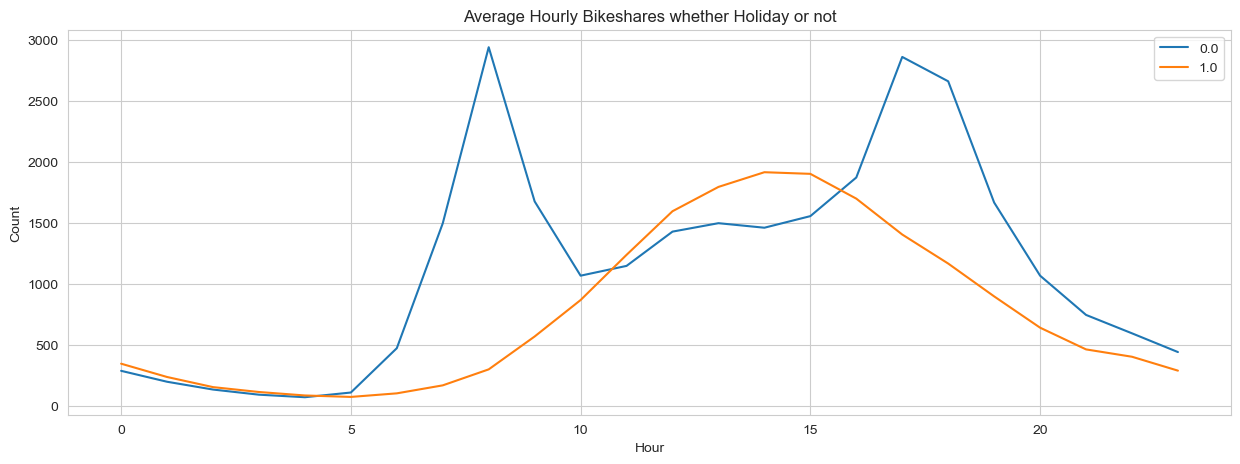

In [28]:
hour_holiday_cnt = df.groupby(["is_holiday","hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for is_holiday in hour_holiday_cnt.index.levels[0]:
    plt.plot(hour_holiday_cnt[is_holiday].index, hour_holiday_cnt[is_holiday], label=is_holiday)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Holiday or not')
plt.show()

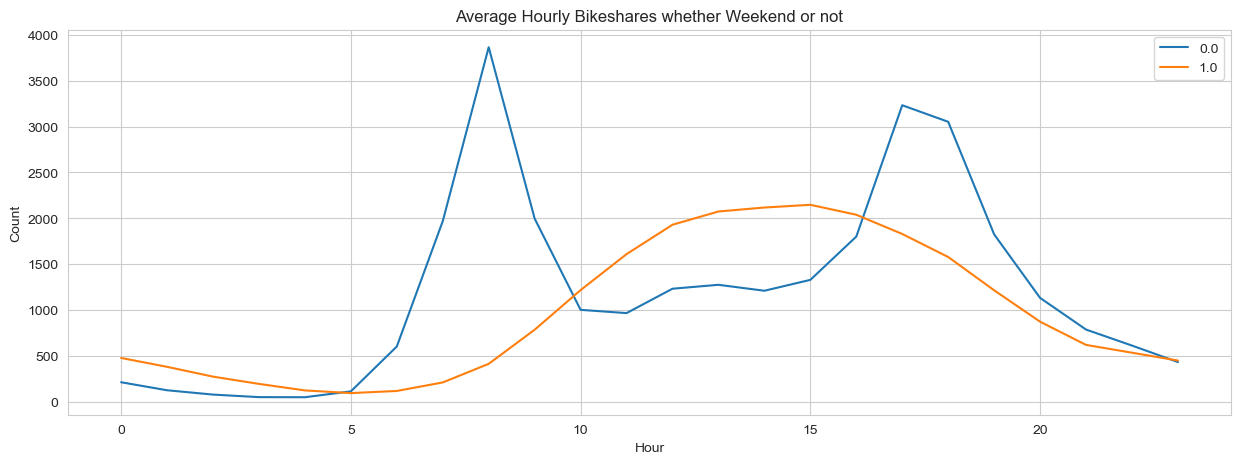

In [29]:
hour_weekend_cnt = df.groupby(["is_weekend","hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for is_weekend in hour_weekend_cnt.index.levels[0]:
    plt.plot(hour_weekend_cnt[is_weekend].index, hour_weekend_cnt[is_weekend], label=is_weekend)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares whether Weekend or not')
plt.show()

It has been observed that more people ride bicycles in warmer weather.

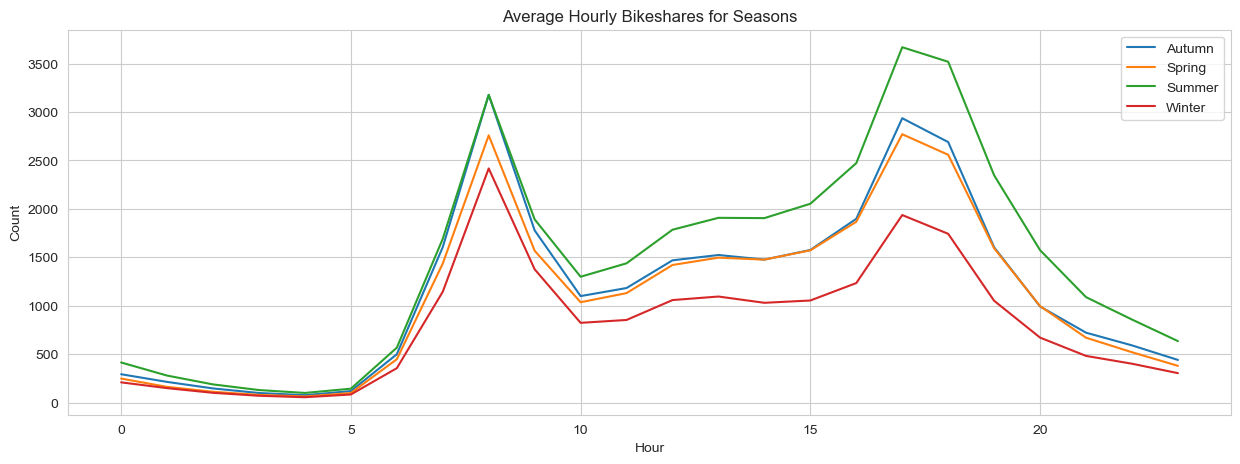

In [30]:
season_hour_cnt = df.groupby(["season_name", "hour"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_hour_cnt.index.levels[0]:
    plt.plot(season_hour_cnt[season].index, season_hour_cnt[season],label=season)

plt.legend()
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Average Hourly Bikeshares for Seasons')
plt.show()

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

It appears that bicycle usage is higher on weekdays, while usage is lower on weekends.

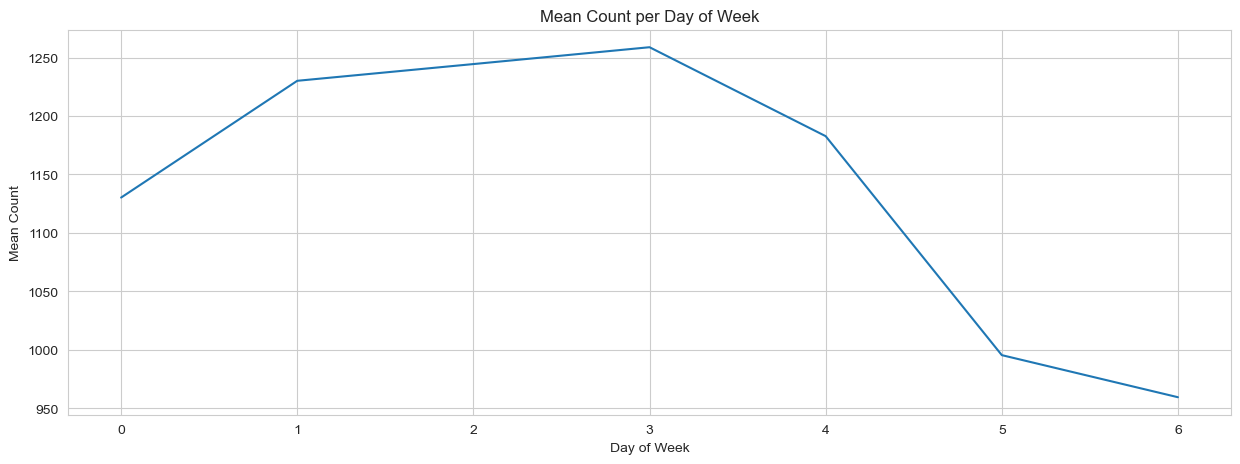

In [32]:
weekday_cnt = df.groupby("dayofweek")["cnt"].mean()

plt.figure(figsize=(15, 5))
sns.lineplot(x=weekday_cnt.index, y=weekday_cnt.values)

plt.xlabel("Day of Week")
plt.ylabel("Mean Count")
plt.title("Mean Count per Day of Week")

plt.show()

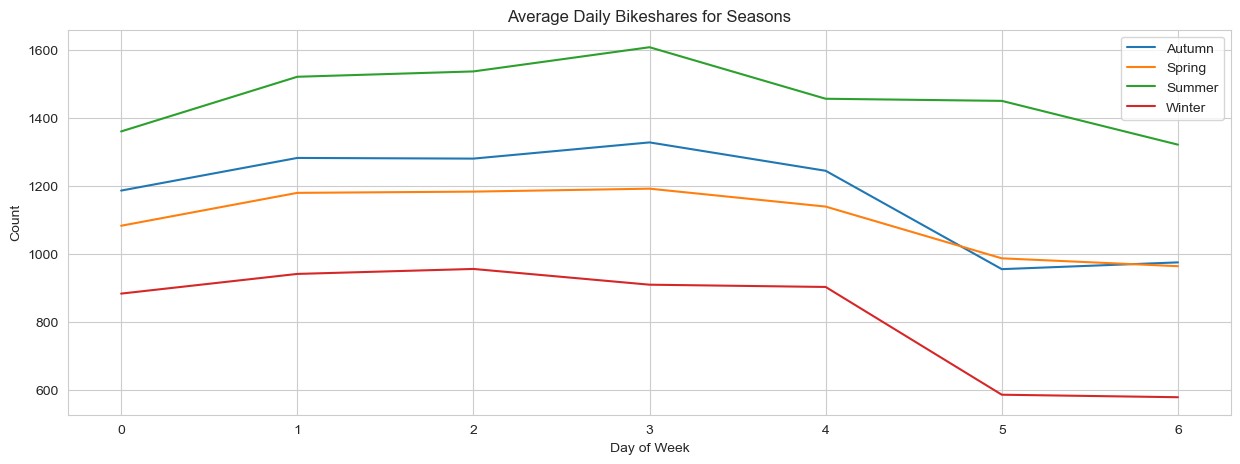

In [33]:
season_dayofweek_cnt = df.groupby(["season_name", "dayofweek"])["cnt"].mean()

plt.figure(figsize=(15,5))
for season in season_dayofweek_cnt.index.levels[0]:
    plt.plot(season_dayofweek_cnt[season].index, season_dayofweek_cnt[season],label=season)

plt.legend()
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Daily Bikeshares for Seasons')
plt.show()

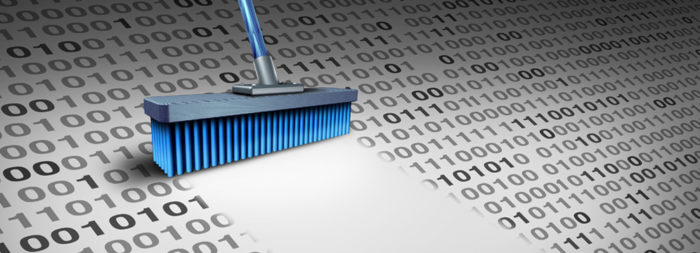

### Drop unnecessary columns

- Check correlations via heatmap
- Check weather_code
- Think about time-based features and decide dropping which is unnecessary for the model

"weather_code" category description:
- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
- 2 = scattered clouds / few clouds 
- 3 = Broken clouds 
- 4 = Cloudy 
- 7 = Rain/ light Rain shower/ Light rain 
- 10 = rain with thunderstorm 
- 26 = snowfall 

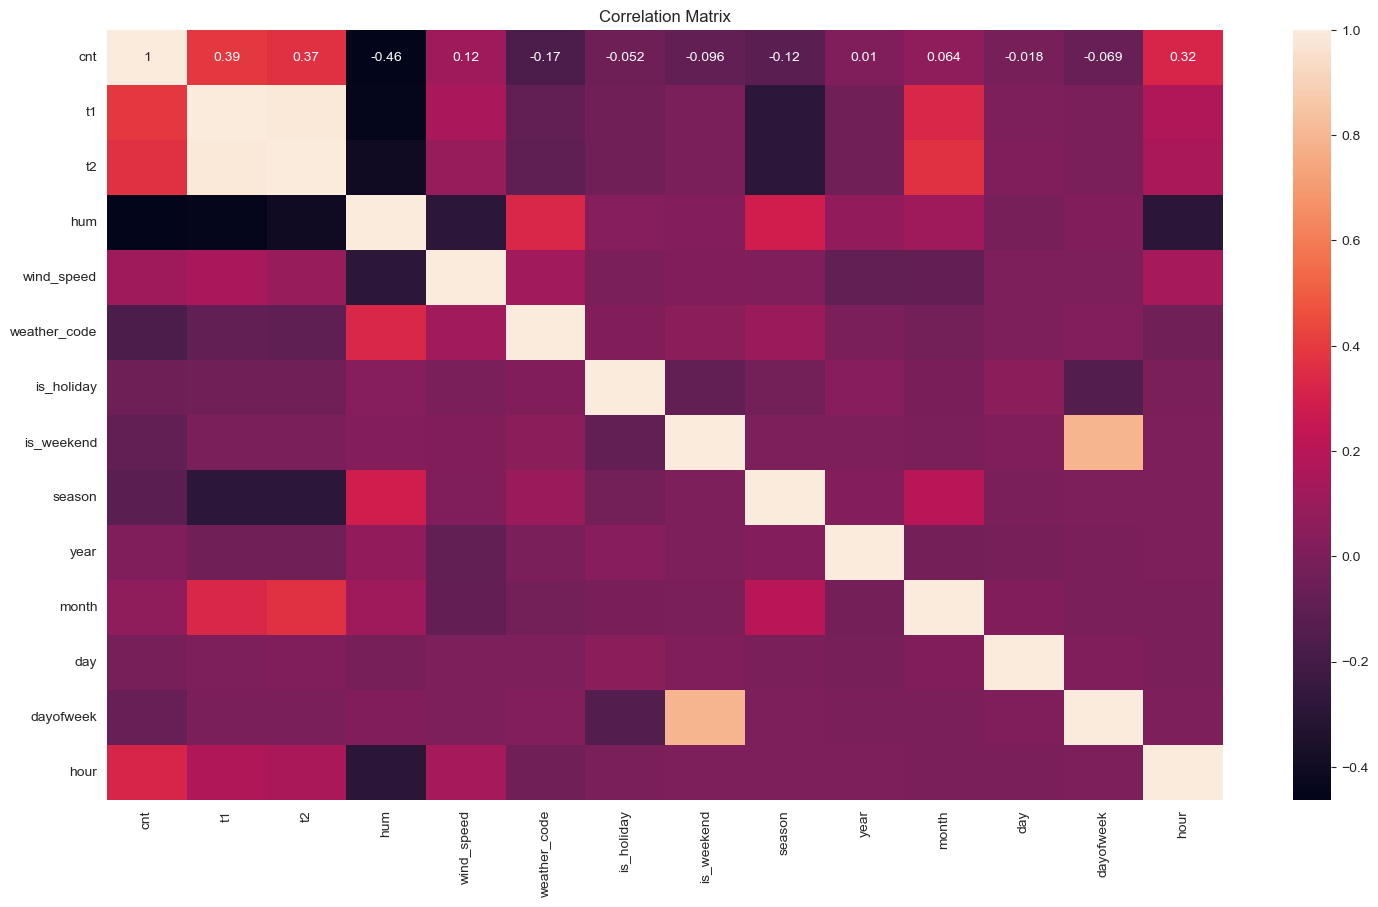

In [35]:
numerical_df = df.select_dtypes(include=[np.number])

# create correlation matrix
correlation_matrix = numerical_df.corr()

# visualize correlation matrix
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

There is a very high correlation between **t1** (actual temperature) and **t2** (feels like temperature). One represents the actual temperature, while the other reflects the perceived or "feels like" temperature.

In [36]:
df.head()

cnt    t1    t2     hum  wind_speed  weather_code  \
timestamp                                                                
2015-01-04 00:00:00  182 3.000 2.000  93.000       6.000         3.000   
2015-01-04 01:00:00  138 3.000 2.500  93.000       5.000         1.000   
2015-01-04 02:00:00  134 2.500 2.500  96.500       0.000         1.000   
2015-01-04 03:00:00   72 2.000 2.000 100.000       0.000         1.000   
2015-01-04 04:00:00   47 2.000 0.000  93.000       6.500         1.000   

                     is_holiday  is_weekend  season  year  month  day  \
timestamp                                                               
2015-01-04 00:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 01:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 02:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 03:00:00       0.000       1.000   3.000  2015      1    4   
2015-01-04 04:00:00       0.000       1.000   3.000  2015      1    4   

                     dayofweek  hour        date season_name  
timestamp                                                     
2015-01-04 00:00:00          6     0  2015-01-04      Winter  
2015-01-04 01:00:00          6     1  2015-01-04      Winter  
2015-01-04 02:00:00          6     2  2015-01-04      Winter  
2015-01-04 03:00:00          6     3  2015-01-04      Winter  
2015-01-04 04:00:00          6     4  2015-01-04      Winter

To better understand the **weather code**, we are grouping it. If the **weather code** is low, it indicates good weather, and if it's high, it indicates bad weather.

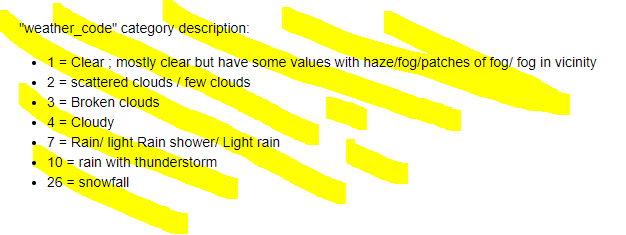

weather_code
1.000    1162.089
2.000    1496.177
3.000    1195.124
4.000     635.231
7.000     712.966
10.000    583.429
26.000    250.850
Name: cnt, dtype: float64


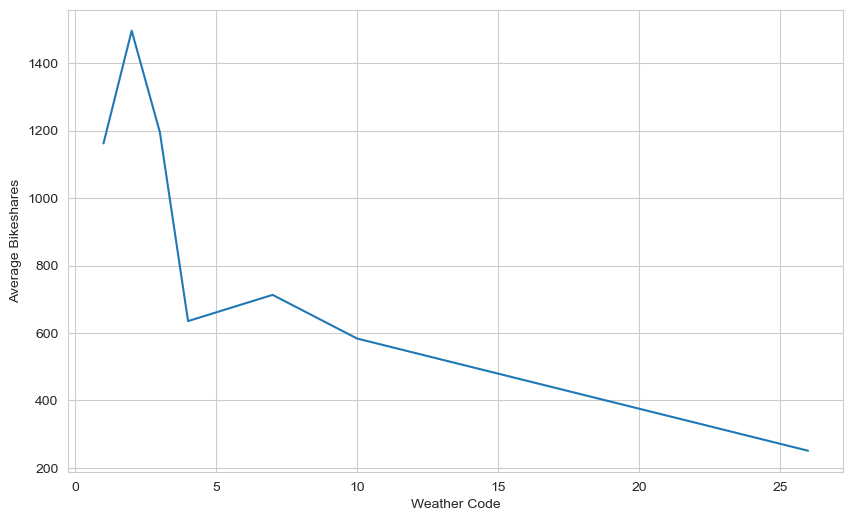

In [37]:
plt.figure(figsize=(10,6))
ax = df.groupby('weather_code')['cnt'].mean().plot()
ax.set(xlabel='Weather Code')
ax.set(ylabel='Average Bikeshares')
print(df.groupby('weather_code')['cnt'].mean())

In time series data, irrelevant columns are generally dropped to focus on the most important features for analysis and modeling.

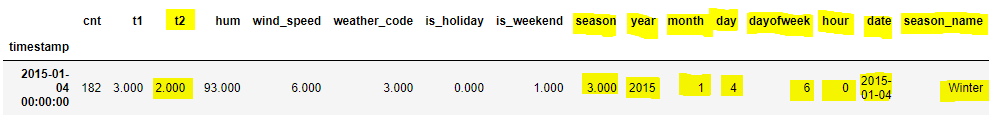

In [38]:
df_raw = df.drop(["t2", "date", "year", "season_name", "season", "month", "dayofweek", "day", "hour"], axis=1)

In [39]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   hum           17414 non-null  float64
 3   wind_speed    17414 non-null  float64
 4   weather_code  17414 non-null  float64
 5   is_holiday    17414 non-null  float64
 6   is_weekend    17414 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 1.1 MB


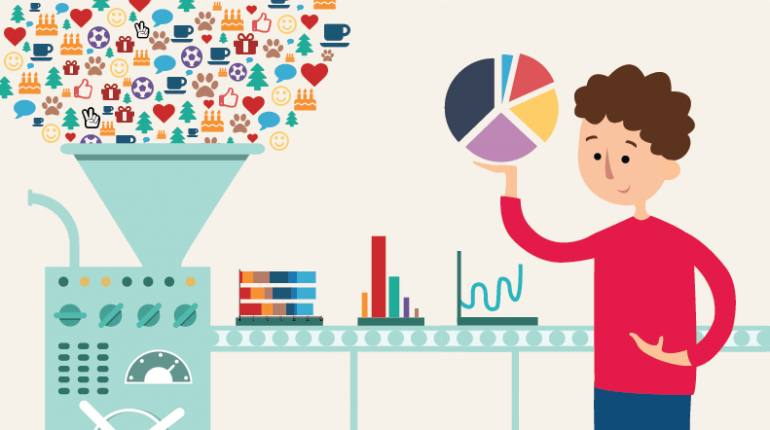

## 2. Data Pre-Processing

### Train - Test Split

Appropriately split the data for optimum training.

"weather code" ı get_dummies yapıyoruz..

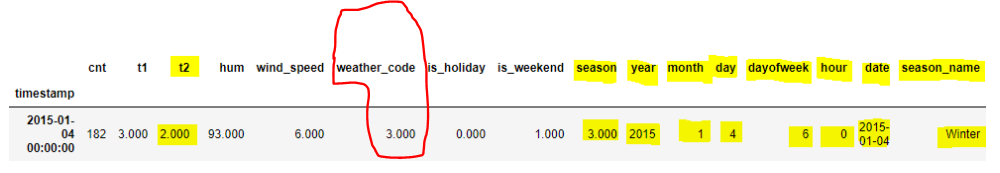

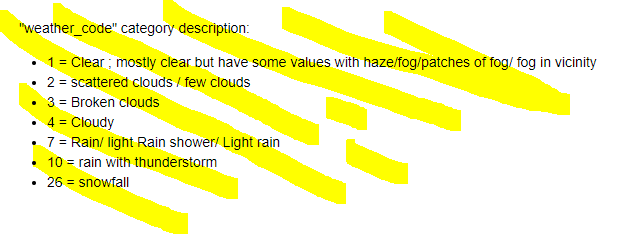

In [40]:
weather_dummy = pd.get_dummies(df_raw['weather_code'].astype("str"), prefix="w_code", drop_first=True)
df_dum = pd.concat([df_raw, weather_dummy],axis=1).drop(["weather_code"],axis=1)
df_dum.head()

cnt    t1     hum  wind_speed  is_holiday  is_weekend  \
timestamp                                                                    
2015-01-04 00:00:00  182 3.000  93.000       6.000       0.000       1.000   
2015-01-04 01:00:00  138 3.000  93.000       5.000       0.000       1.000   
2015-01-04 02:00:00  134 2.500  96.500       0.000       0.000       1.000   
2015-01-04 03:00:00   72 2.000 100.000       0.000       0.000       1.000   
2015-01-04 04:00:00   47 2.000  93.000       6.500       0.000       1.000   

                     w_code_10.0  w_code_2.0  w_code_26.0  w_code_3.0  \
timestamp                                                               
2015-01-04 00:00:00        False       False        False        True   
2015-01-04 01:00:00        False       False        False       False   
2015-01-04 02:00:00        False       False        False       False   
2015-01-04 03:00:00        False       False        False       False   
2015-01-04 04:00:00        False       False        False       False   

                     w_code_4.0  w_code_7.0  
timestamp                                    
2015-01-04 00:00:00       False       False  
2015-01-04 01:00:00       False       False  
2015-01-04 02:00:00       False       False  
2015-01-04 03:00:00       False       False  
2015-01-04 04:00:00       False       False

7 feature böylece 12 feature e dönüşmüş oldu. 

In [41]:
df_dum.shape

(17414, 12)

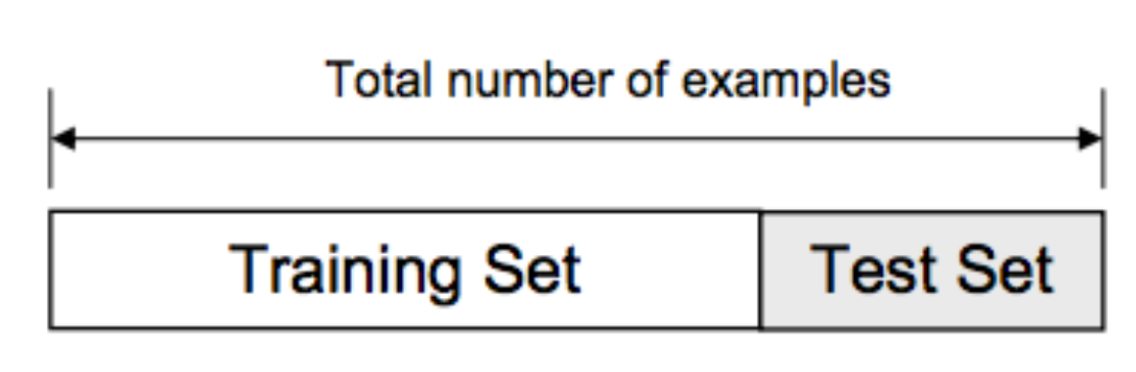

In [42]:
train_size = int(len(df_dum) * 0.9)
test_size = len(df_dum) - train_size

train, test = df_dum.iloc[0:train_size], df_dum.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [43]:
train.shape

(15672, 12)

In [44]:
test.shape

(1742, 12)

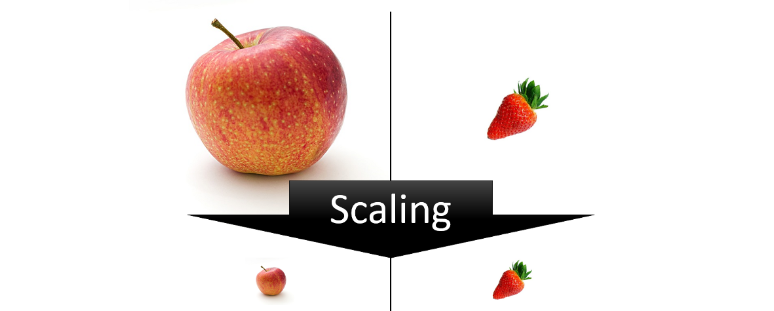

Performing data scaling before providing data to the RNN model is generally important. Data scaling helps address imbalances that can affect model performance when the data features have different ranges.

For RNN models, it is particularly recommended to scale the data to a range of -1 to 1 or 0 to 1. This can help the RNN process gradients more effectively and learn faster.

If you feed the data directly into the RNN model without scaling, the model's performance may decrease, or the training may not occur as desired. Additionally, when there are significant value differences between different features, weight updates can become inconsistent, making it difficult for the model to produce accurate results.

Therefore, performing data scaling before supplying data to RNN models generally leads to better outcomes. By using scaling methods (such as Min-Max scaling or Standardization) to bring the data into an appropriate range, you can enable the model to learn more effectively.

### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1'/'t2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

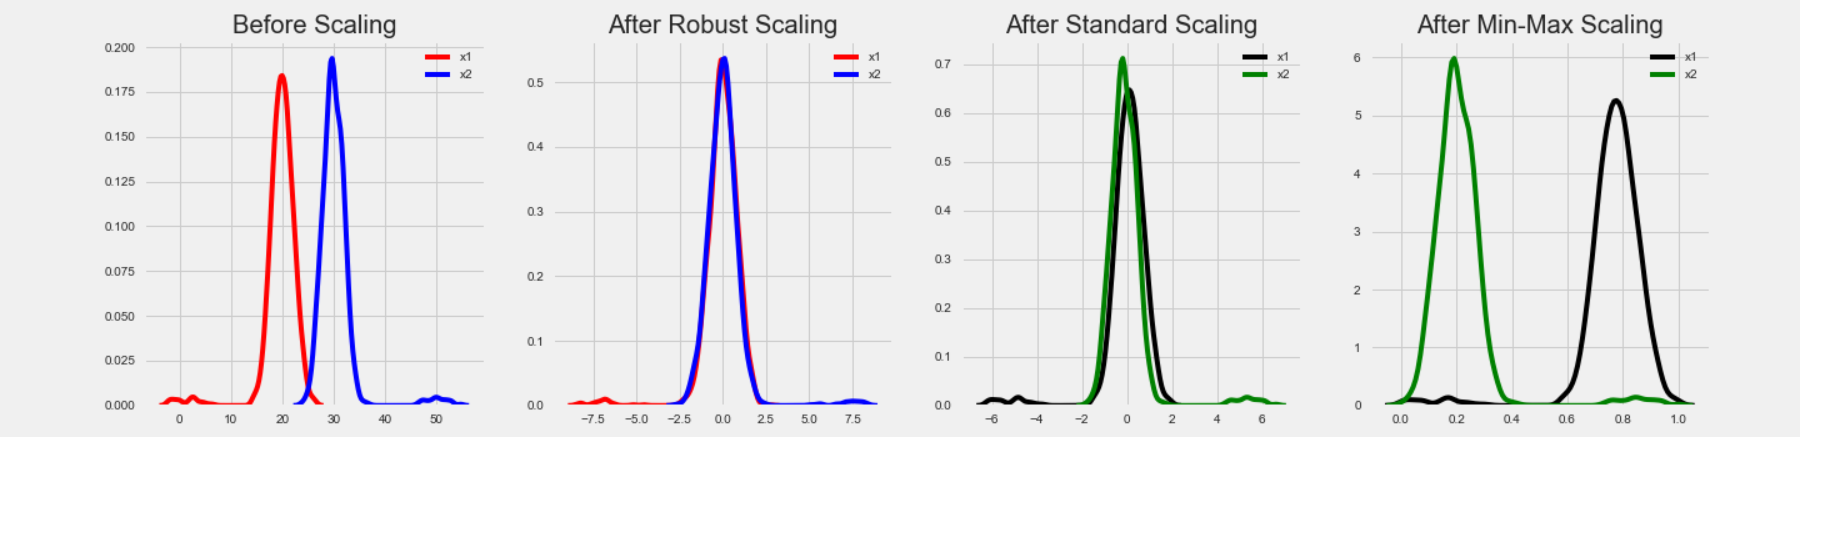

In [45]:
from sklearn.preprocessing import RobustScaler

**Robust Scaling** scales the data based on the median and interquartile range (percentiles). As a result, the impact of outliers is reduced, helping the LSTM model to train in a more balanced way.

When there was only one feature, the entire dataset was scaled using MinMax scaling. After that, the train data for the feature was fit and transformed, while the test data was only transformed without fitting again.

We will not include the dummy features in the scaling process, as they are already between 0 and 1.

In [46]:
df_dum.columns

Index(['cnt', 't1', 'hum', 'wind_speed', 'is_holiday', 'is_weekend',
       'w_code_10.0', 'w_code_2.0', 'w_code_26.0', 'w_code_3.0', 'w_code_4.0',
       'w_code_7.0'],
      dtype='object')

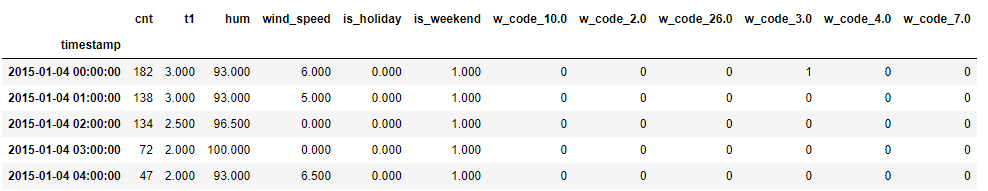

In our dataset, the target label will be **CNT**, which represents the count.

Since we will later apply **inverse transform** only to our target column (CNT), we need to separate it here and avoid scaling it together with the other features. For a single feature, it was done like this: 

train_scaled = scaler.fit_transform(train)

test_scaled = scaler.transform(test)

We perform data scaling separately for the target variable and the features for the following reasons:

1. **Different Scale Ranges**: The target variable and features often have different scale ranges. Especially in regression problems, it is common for the target variable to be in a much larger range while the features may be in a smaller range. In such cases, separate scaling can enhance the model's performance.

2. **Special Requirements for the Target Variable**: The target variable may sometimes require specific processing or scaling methods. For example, some regression models require the target variable to have a normal distribution. Therefore, the target variable may need to undergo a specialized scaling process.

For these reasons, performing separate scaling for the target variable and the features can improve the model's performance and help ensure that the results are more reliable.

In [47]:
f_columns = ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()   # scaler used for the features
target_transformer = RobustScaler()   # scaler used for the target

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
# The expression train.loc[:, f_columns] selects all rows in the train dataset and the columns specified in the f_columns list
train['cnt'] = target_transformer.fit_transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])
# The expression test.loc[:, f_columns] selects all rows in the test dataset and the columns specified in the f_columns list.

test['cnt'] = target_transformer.transform(test[['cnt']])


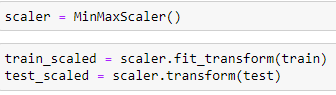

### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

In [48]:
df_dum

cnt     t1   hum  wind_speed  is_holiday  is_weekend  \
timestamp                                                                    
2015-01-04 00:00:00   182 -1.250 0.975      -0.818       0.000       1.000   
2015-01-04 01:00:00   138 -1.250 0.975      -0.909       0.000       1.000   
2015-01-04 02:00:00   134 -1.312 1.150      -1.364       0.000       1.000   
2015-01-04 03:00:00    72 -1.375 1.325      -1.364       0.000       1.000   
2015-01-04 04:00:00    47 -1.375 0.975      -0.773       0.000       1.000   
...                   ...    ...   ...         ...         ...         ...   
2017-01-03 19:00:00  1042 -1.000 0.375       0.364       0.000       0.000   
2017-01-03 20:00:00   541 -1.000 0.375       0.545       0.000       0.000   
2017-01-03 21:00:00   337 -0.938 0.250       0.818       0.000       0.000   
2017-01-03 22:00:00   224 -0.938 0.125       0.727       0.000       0.000   
2017-01-03 23:00:00   139 -1.000 0.125       0.636       0.000       0.000   

                     w_code_10.0  w_code_2.0  w_code_26.0  w_code_3.0  \
timestamp                                                               
2015-01-04 00:00:00        False       False        False        True   
2015-01-04 01:00:00        False       False        False       False   
2015-01-04 02:00:00        False       False        False       False   
2015-01-04 03:00:00        False       False        False       False   
2015-01-04 04:00:00        False       False        False       False   
...                          ...         ...          ...         ...   
2017-01-03 19:00:00        False       False        False        True   
2017-01-03 20:00:00        False       False        False       False   
2017-01-03 21:00:00        False       False        False       False   
2017-01-03 22:00:00        False       False        False       False   
2017-01-03 23:00:00        False        True        False       False   

                     w_code_4.0  w_code_7.0  
timestamp                                    
2015-01-04 00:00:00       False       False  
2015-01-04 01:00:00       False       False  
2015-01-04 02:00:00       False       False  
2015-01-04 03:00:00       False       False  
2015-01-04 04:00:00       False       False  
...                         ...         ...  
2017-01-03 19:00:00       False       False  
2017-01-03 20:00:00        True       False  
2017-01-03 21:00:00        True       False  
2017-01-03 22:00:00        True       False  
2017-01-03 23:00:00       False       False  

[17414 rows x 12 columns]

In [49]:
def create_dataset(X, y, time_steps=1):  # buraya X ve y train i vereceğiz.
   
    Xs, ys = [], []   # 2 tane boş liste oluşturuyor ve bunlara X ve y train leri atayacağız. 
    for i in range(len(X) - time_steps):      # length i ne ise oraya kadar gidecek.
        v = X.iloc[i:(i + time_steps)].values # her döngüde bana verdiğim train data sını O İLE 23 arasını value yani data frame olarak al
        Xs.append(v)                          # bu değeri ilk listenin içine at. paketler halinde atacak.. 0.24, 1-25 etc..
        ys.append(y.iloc[i + time_steps])   # bu sefer i (0) + 23 (indes) yani 24 nci datayı y ye koy
    return np.array(Xs), np.array(ys)  # daha sonra bunları array e çevir..

1. The `create_dataset` function takes two datasets as input, called 'X' and 'y'. These are typically the training datasets.

2. Two empty lists, 'Xs' and 'ys', are created. These lists will be used to store the input and output data.

3. A 'for' loop iterates over the length of the 'X' dataset, allowing us to access each element in the dataset.

4. In each iteration, we extract the data between index 'i' and 'i + time_steps' from the 'X' dataset. This represents the input data considered sequentially over a certain time step.

5. We append these input data slices to the 'Xs' list.

6. Simultaneously, we append the corresponding output value from the 'y' dataset at index 'i + time_steps' to the 'ys' list.

7. Finally, we return the 'Xs' and 'ys' lists converted into NumPy arrays. These arrays can be used for model training or prediction.

In this way, the `create_dataset` function is used to transform a time series into input and output data over a specified time step.

If the 'time_steps' value was set to 2, the `create_dataset` function would work as follows:

**Input (X)**: [1, 2, 3, 4, 5, 6, 7, 8, 9]  
**Output (y)**: [3, 4, 5, 6, 7, 8, 9, 10]

The function takes two consecutive time steps as input in each iteration and appends the value of the next time step as the output. For example, in the first iteration, the input would be [1, 2] and the output would be 3. In the second iteration, the input would be [2, 3] and the output would be 4, and so on. In the final iteration, the input would be [8, 9] and the output would be 10.

As a result, the `create_dataset` function would return the following output:

**Input array (Xs)**:  
`[[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7], [7, 8], [8, 9]]`

**Output array (ys)**:  
`[3, 4, 5, 6, 7, 8, 9, 10]`

In this way, the dataset is transformed to have two time steps as the input and the following time step as the output for each instance.

Using the `create_dataset` function we defined earlier, we have generated `X_train` and `y_train`.

In [50]:
time_steps = 24  

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15648, 24, 12) (15648,)
(1718, 24, 12) (1718,)


In this code snippet, the `create_dataset` function is used to transform the dataset into a format suitable for the RNN model.

RNN models expect input in the form of a 3-dimensional array: `[samples, time steps, n_features]`. In this structure, `samples` represents the number of data points, `time steps` represents the number of time steps, and `n_features` represents the number of features used at each time step.

In the previous step, when we examined the `create_dataset` function, we saw that it converts the input ("X") and output ("y") data into arrays. Here, `X_train` and `X_test` are the input arrays, while `y_train` and `y_test` are the output arrays.

This step is used to reshape the input data to be compatible with the specified time steps. Each input array contains a specified number of consecutive time steps. For example, if the `time_steps` value is 24, each input array will contain 24 consecutive time steps. This way, the time series dataset is structured appropriately for the RNN model.

As a result, the `X_train` and `X_test` input arrays, along with the `y_train` and `y_test` output arrays, are transformed into a 3-dimensional structure to be provided to the RNN model. This allows the model to process input and output over time steps and model time dependencies effectively.

In [51]:
X_train

array([[[-0.46487603305785125, -1.25, 0.975, ..., True, False, False],
        [-0.4951790633608815, -1.25, 0.975, ..., False, False, False],
        [-0.49793388429752067, -1.3125, 1.15, ..., False, False, False],
        ...,
        [-0.4380165289256198, -1.25, 0.975, ..., False, True, False],
        [-0.46763085399449034, -1.25, 0.975, ..., False, True, False],
        [-0.4820936639118457, -1.125, 0.675, ..., False, True, False]],

       [[-0.4951790633608815, -1.25, 0.975, ..., False, False, False],
        [-0.49793388429752067, -1.3125, 1.15, ..., False, False, False],
        [-0.540633608815427, -1.375, 1.325, ..., False, False, False],
        ...,
        [-0.46763085399449034, -1.25, 0.975, ..., False, True, False],
        [-0.4820936639118457, -1.125, 0.675, ..., False, True, False],
        [-0.5330578512396694, -1.125, 0.975, ..., False, True, False]],

       [[-0.49793388429752067, -1.3125, 1.15, ..., False, False, False],
        [-0.540633608815427, -1.375, 1.325

In [52]:
X_test

array([[[-0.37052341597796146, -0.625, 0.675, ..., False, False, False],
        [-0.07782369146005509, -0.4375, 0.275, ..., False, False, False],
        [0.34573002754820936, -0.3125, 0.025, ..., True, False, False],
        ...,
        [-0.5034435261707989, -0.375, 0.275, ..., False, False, False],
        [-0.18732782369146006, -0.3125, 0.3, ..., False, False, True],
        [0.768595041322314, -0.25, 0.3, ..., False, False, False]],

       [[-0.07782369146005509, -0.4375, 0.275, ..., False, False, False],
        [0.34573002754820936, -0.3125, 0.025, ..., True, False, False],
        [0.7183195592286501, -0.125, -0.2, ..., False, False, False],
        ...,
        [-0.18732782369146006, -0.3125, 0.3, ..., False, False, True],
        [0.768595041322314, -0.25, 0.3, ..., False, False, False],
        [2.1542699724517904, -0.25, 0.175, ..., False, False, False]],

       [[0.34573002754820936, -0.3125, 0.025, ..., True, False, False],
        [0.7183195592286501, -0.125, -0.2, ..

---
---

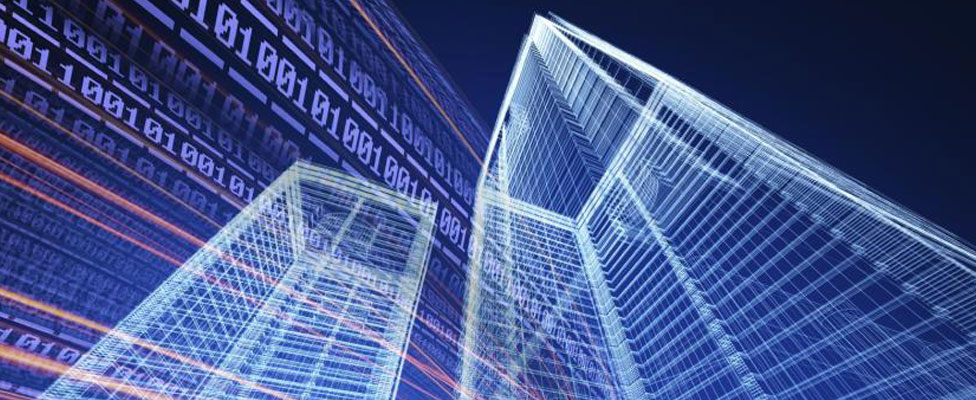

## 3. Model Building with GRU


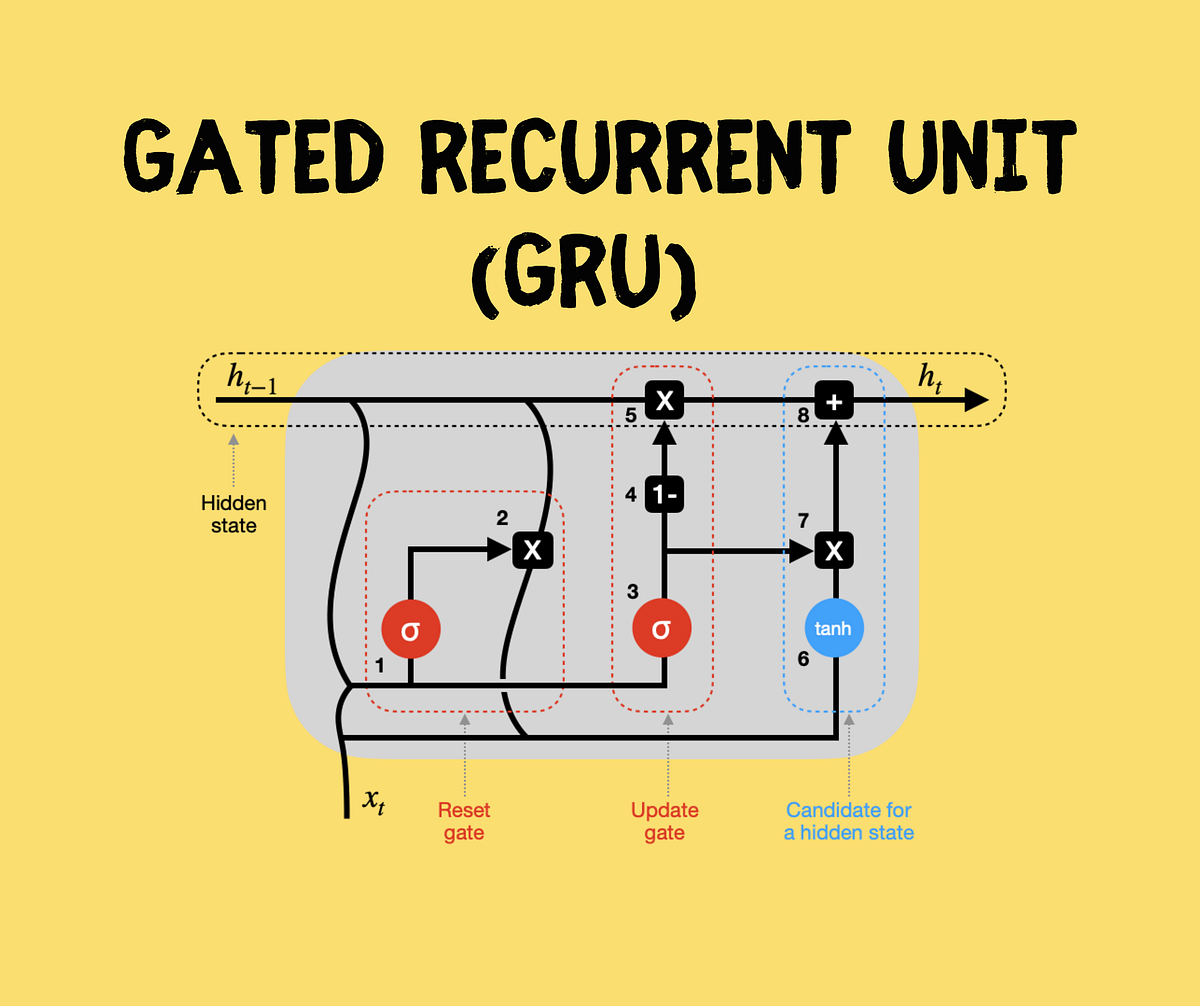

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout,GRU
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
X_train.shape

(15648, 24, 12)

It is more beneficial to increase the depth of the model rather than its width.

In the expression `X_train.shape[2]`, the `2` refers to the third dimension of the `X_train` dataset's shape.

Typically, in machine learning problems, datasets can be either 2D (for example, in a tabular format) or 3D (for example, in image or time series data). In 3D datasets, the data is represented as an array, and the third dimension represents different features of the data points.

For instance, consider a time series dataset. Each data point consists of values measured over time steps. In this case, the shape of the `X_train` dataset could be (for example) (100, 10, 3), where 100 represents the number of data points, 10 represents the number of time steps for each data point, and 3 represents the number of features measured at each time step.

Therefore, the expression `X_train.shape[2]` gives the size of the third dimension of the `X_train` dataset, which represents the number of features present for each data point.

In [55]:
n_features = X_train.shape[2]

In [56]:
model = Sequential()
model.add(Bidirectional(GRU(units=128, input_shape=(time_steps, n_features))))    # It will expect data of shape (24, 12) from me
# The purpose of BIDIRECTIONAL here is to combine the outputs from both forward and backward passes.
# It first takes my series from 1 to 24, then from 24 back to 1, and passes the combined results to the next layer.
# model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [57]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

The `restore_best_weights=True` parameter ensures that the weights of the best-performing model are restored when using early stopping during training.

Early stopping is a technique used to monitor the training process of a model. As training progresses, the training loss typically decreases, while the validation loss may increase. An increase in validation loss may indicate that the model is overfitting and losing its ability to generalize.

Early stopping involves setting a certain patience value, and if the validation loss does not improve for a specified duration, training is halted. This is a useful method to prevent overfitting and achieve better generalization.

The `restore_best_weights=True` parameter allows for the weights of the best-performing model to be restored at the end of the early stopping process. This means that the weights from the best model, recorded at the point where early stopping was triggered, are used. As a result, when the model training is stopped, it retains the best-performing weights, which can be used for making predictions.

This method is generally employed to prevent overfitting and improve generalization.

In [58]:
# When we say patience=5, the fifth value from the end is our best value.
# With `restore_best_weights`, we indicate to take the weights from the point where the best performance was achieved.
# If we do not specify this, it will take the weights from the last epoch.
# However, the best value might be at a different point, which is likely to be lower than the last one.


The use of `validation_split` in RNN does not disrupt the order while randomly splitting the dataset, making it a suitable approach for obtaining accurate results on time series data.

In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 256)                 │         109,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 327,941 (1.25 MB)

 Trainable params: 109,313 (427.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,628 (854.02 KB)

In [60]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

X_test = X_train.astype('float32')
y_test = y_train.astype('float32')

In [61]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=32, 
          validation_split=0.3,
          callbacks=[early_stop])

Epoch 1/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 0.1729 - val_loss: 0.0746
Epoch 2/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0489 - val_loss: 0.0317
Epoch 3/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0274 - val_loss: 0.0242
Epoch 4/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - loss: 0.0205 - val_loss: 0.0220
Epoch 5/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0156 - val_loss: 0.0227
Epoch 6/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - loss: 0.0142 - val_loss: 0.0201
Epoch 7/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0149 - val_loss: 0.0229
Epoch 8/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0152 - val_loss: 0.0205
Epoch 9/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - loss: 0.0171 - val_loss: 0.0217
Epoch 10/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0134 - val_loss: 0.0181
Epoch 11/30
343/343 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0147 - val_loss: 0.0177
Epoch 12/30
343/343 ━━━━━━━━━━━

<Axes: >

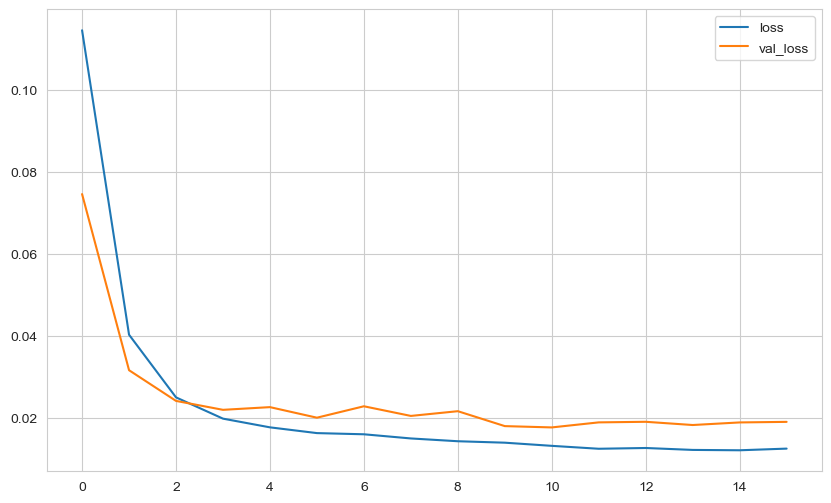

In [63]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

---
---

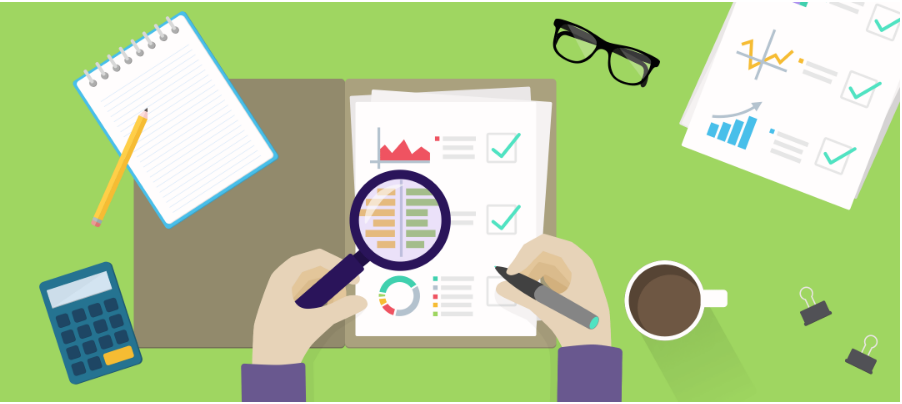

## 4. Evaluate on Test Data

At this stage, you will measure the prediction success of your model. So, you will need to compare the actual values of the test data with their predicted values. 

For this reason, you must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data you have previously scaled.

Check scores with both scaled results and inversed results

Plot predictions and actula values together

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [66]:
y_pred = model.predict(X_test)

489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step


In [67]:
eval_metrics(y_test, y_pred)

r2_score: 0.9764409645043244 
mae: 0.07355134 
mse: 0.013507199 
rmse: 0.116220474


### Inverse Transformation and Compare

In [68]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))   # reshape ile tek satır haline getirmiş oluyoruz
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))     # kaç sütun ise o kadar sütun olacak
y_pred_inv = target_transformer.inverse_transform(y_pred)

In RNN, inverse transformation and comparison operations are used to revert the scaling process and convert the prediction results back to their original scales for comparison with actual values.

First, the target variable values are scaled to a specific range through the scaling process applied to the training and test datasets. This scaling ensures that the data is brought into a suitable range for the model to perform better.

However, to interpret the prediction results and compare them with actual values, the scaling must be reversed. Therefore, the inverse transformation process is used to convert the prediction results back to their original scales.

The `target.transformer.inverse_transform()` function reverses the scaling done by `RobustScaler` and converts the prediction results to their original scales.

As a result, both the prediction results and the actual values are transformed back to their original scales, allowing for comparison with the data that underwent the same scaling process. This way, the model's performance can be evaluated, and the accuracy of the predictions can be understood.

In [71]:
test_index = test.iloc[time_steps:].index

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)),
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
#pred_test.index = test_index

The command `y_test_inv.reshape(-1, 1)` converts the `y_test_inv` array into a single-column matrix. This operation is typically performed to ensure that feature matrices or target variables have appropriate dimensions when working with machine learning models.

In [72]:
pred_test

test  prediction
0      83.000     160.962
1      67.000      90.680
2      32.000     123.368
3      22.000      95.113
4      38.000     114.226
...       ...         ...
15643 217.000     334.359
15644 150.000     195.063
15645 107.000     162.392
15646 107.000     152.531
15647 173.000     219.349

[15648 rows x 2 columns]

In the first line, a figure for the graph is created, and the size of this figure is specified using `figsize`. This helps display the results in a larger and more readable format.

In the second line, the actual values of the training data (`y_train_inv`) are plotted as a green line and labeled as "history." This represents the historical data on which the model was trained.

In the third line, the actual values of the test data (`y_test_inv`) are plotted as blue dots and labeled as "true." This allows for a comparison of the predictions with the actual test data.

In the fourth line, the results of the model's predictions (`y_pred_inv`) are plotted as a red line and labeled as "prediction." This represents the section where the model predicts future values.

In the fifth line, the y-axis title is set to "Bike Count," and the x-axis title is set to "Time Step."

In the sixth line, a legend is included to indicate which value each line represents.

In the seventh line, `plt.show()` is used to display the graph.

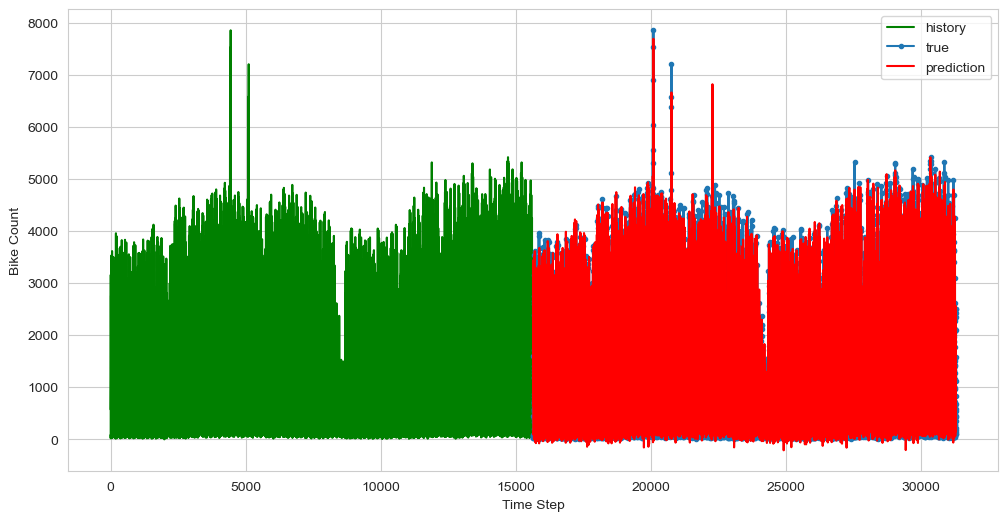

In [73]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In the first line, a figure for the graph is created, and the size of this figure is specified using `figsize`. This helps display the results in a larger and more readable format.

In the second line, the actual values of the test data (`y_test_inv`) are plotted as blue dots and labeled as "true." This allows for a comparison of the predictions with the actual test data.

In the third line, the results of the model's predictions (`y_pred_inv`) are plotted as a red line and labeled as "prediction." This represents the section where the model predicts future values.

In the fourth line, the y-axis title is set to "Bike Count," and the x-axis title is set to "Time Step."

In the fifth line, a legend is included to indicate which value each line represents.

In the sixth line, `plt.show()` is used to display the graph.

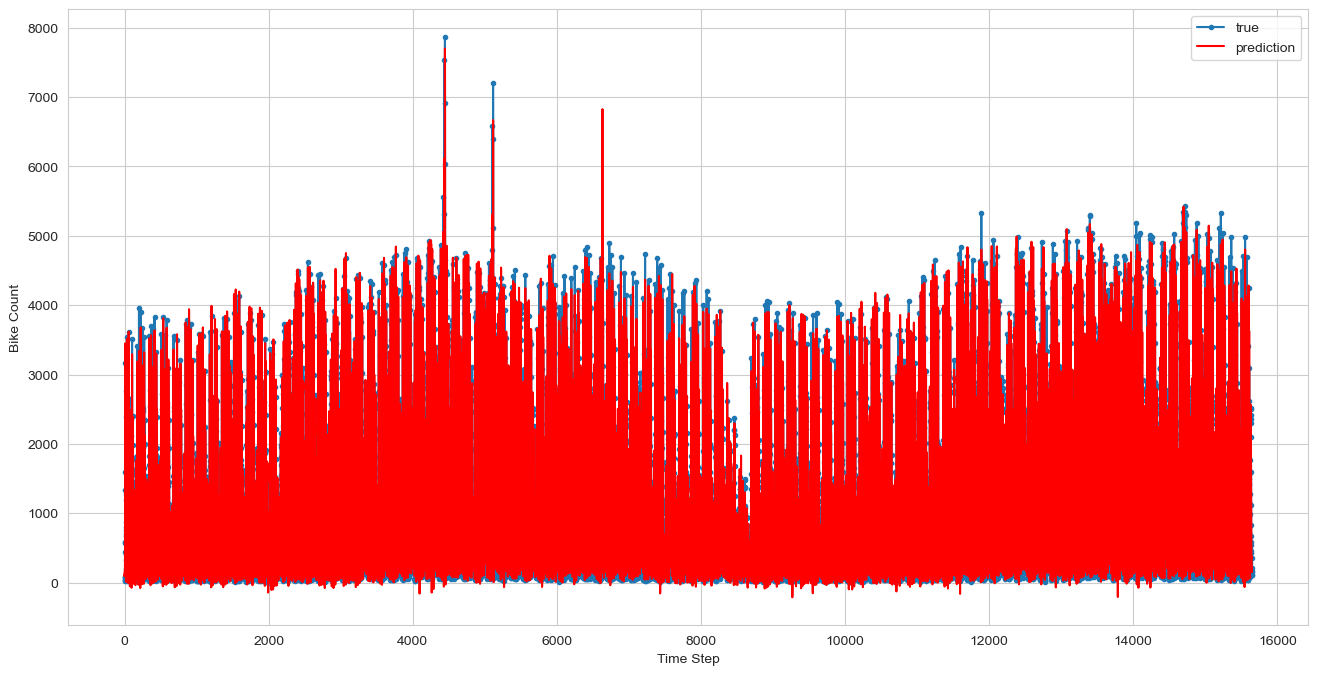

In [74]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

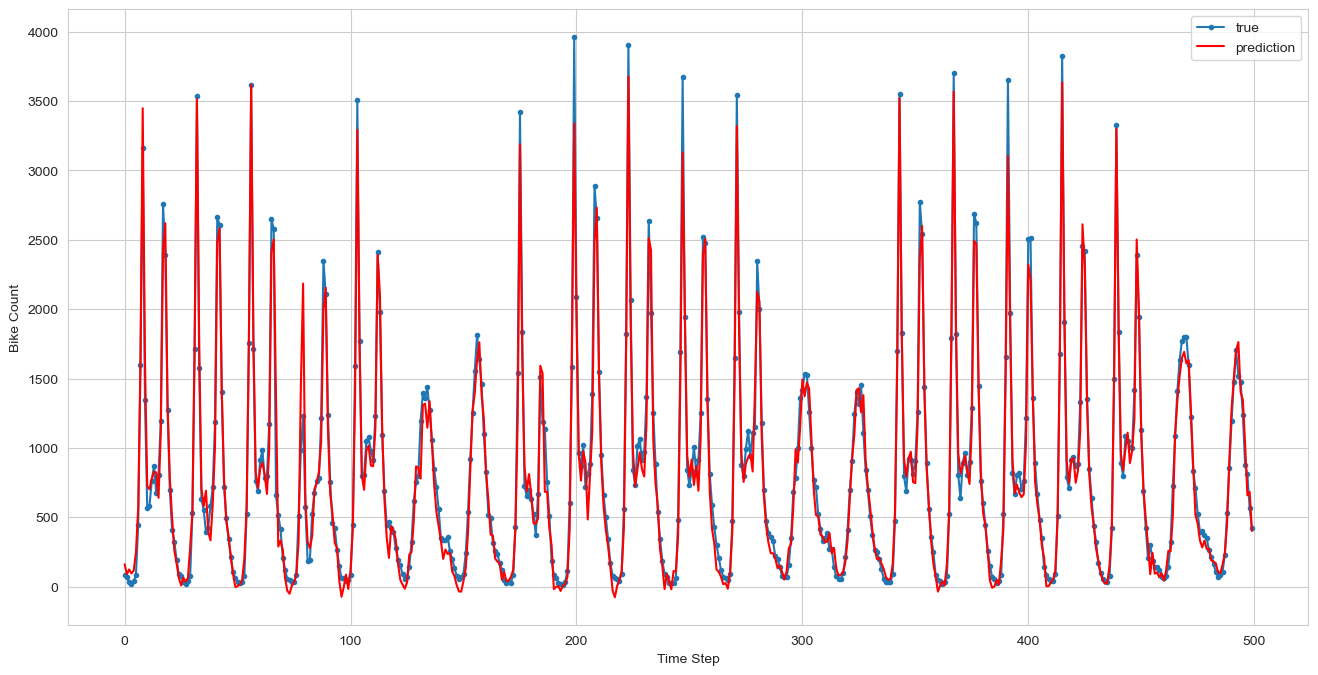

In [75]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten()[0:500], marker='.', label="true")
plt.plot(y_pred_inv.flatten()[0:500], 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

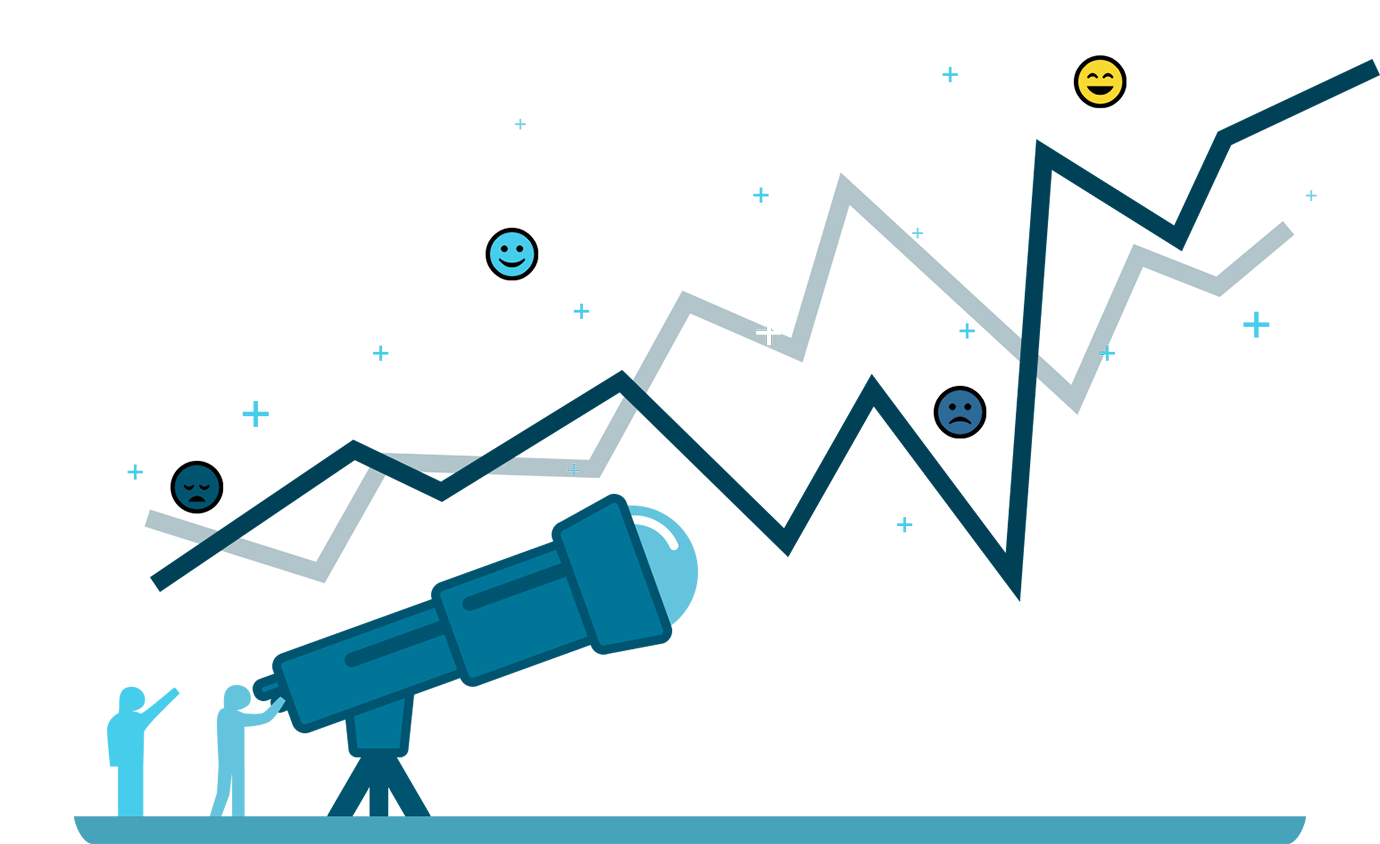

## 5. Retrain and Forecasting

### Scale full data

Let's devide dataset as "full" and "val". We can think about this "val" data as the weather forecast of next days.

In [76]:
val_size = 24
val = df_dum.iloc[-val_size:]
full = df_dum.iloc[:-val_size]
print(len(full), len(val))

17390 24


This code block is used to split the dataset into training and validation sections for retraining and forecasting in an RNN.

1. First, the variable `val_size` is set to 24, indicating that the last 24 examples will be allocated as the validation dataset.

2. Then, the variable `val` is assigned the last 24 examples from the `df_dum` DataFrame. This selects the last 24 examples from `df_dum` and assigns them to the `val` variable. This validation dataset will be used to assess the model's performance.

3. The variable `full` is assigned all examples from the `df_dum` DataFrame except for the last 24. This is done using the expression `df_dum.iloc[:-val_size]`, which selects all examples except for the last 24 and assigns them to the `full` variable. This training dataset will be used for retraining the model.

4. Finally, the lengths of the `full` and `val` datasets are printed to the screen using `len(full)` and `len(val)`.

This process allows for the separation of the last 24 examples from the previously trained dataset as the validation dataset, while the remaining examples are used to retrain the model. After the model is retrained, predictions can be made on the validation dataset, and the model's performance can be evaluated.

In [77]:
f_columns = ['t1', 'hum', 'wind_speed']

f_transformer = RobustScaler()
target_transformer = RobustScaler()

full.loc[:, f_columns] = f_transformer.fit_transform(full[f_columns].to_numpy())
full['cnt'] = target_transformer.fit_transform(full[['cnt']])

val.loc[:, f_columns] = f_transformer.transform(val[f_columns])
val['cnt'] = target_transformer.transform(val[['cnt']])

In [78]:
full

cnt     t1   hum  wind_speed  is_holiday  is_weekend  \
timestamp                                                                     
2015-01-04 00:00:00 -0.468 -1.188 0.925      -0.857       0.000       1.000   
2015-01-04 01:00:00 -0.499 -1.188 0.925      -0.952       0.000       1.000   
2015-01-04 02:00:00 -0.501 -1.250 1.100      -1.429       0.000       1.000   
2015-01-04 03:00:00 -0.545 -1.312 1.275      -1.429       0.000       1.000   
2015-01-04 04:00:00 -0.563 -1.312 0.925      -0.810       0.000       1.000   
...                    ...    ...   ...         ...         ...         ...   
2017-01-02 19:00:00 -0.290 -1.188 0.325      -0.381       1.000       0.000   
2017-01-02 20:00:00 -0.360 -1.188 0.025      -0.190       1.000       0.000   
2017-01-02 21:00:00 -0.431 -1.250 0.175      -0.381       1.000       0.000   
2017-01-02 22:00:00 -0.454 -1.312 0.325      -0.476       1.000       0.000   
2017-01-02 23:00:00 -0.494 -1.438 0.925      -0.476       1.000       0.000   

                     w_code_10.0  w_code_2.0  w_code_26.0  w_code_3.0  \
timestamp                                                               
2015-01-04 00:00:00        False       False        False        True   
2015-01-04 01:00:00        False       False        False       False   
2015-01-04 02:00:00        False       False        False       False   
2015-01-04 03:00:00        False       False        False       False   
2015-01-04 04:00:00        False       False        False       False   
...                          ...         ...          ...         ...   
2017-01-02 19:00:00        False       False        False       False   
2017-01-02 20:00:00        False       False        False       False   
2017-01-02 21:00:00        False       False        False       False   
2017-01-02 22:00:00        False       False        False       False   
2017-01-02 23:00:00        False       False        False       False   

                     w_code_4.0  w_code_7.0  
timestamp                                    
2015-01-04 00:00:00       False       False  
2015-01-04 01:00:00       False       False  
2015-01-04 02:00:00       False       False  
2015-01-04 03:00:00       False       False  
2015-01-04 04:00:00       False       False  
...                         ...         ...  
2017-01-02 19:00:00       False       False  
2017-01-02 20:00:00       False       False  
2017-01-02 21:00:00       False       False  
2017-01-02 22:00:00       False       False  
2017-01-02 23:00:00       False       False  

[17390 rows x 12 columns]

### reshape to [samples, time_steps, n_features]

In [79]:
X, y = create_dataset(full, full.cnt, time_steps)

print(X.shape, y.shape)

(17366, 24, 12) (17366,)


`full.cnt` refers to the "cnt" column in the `full` dataset. Here, the "cnt" column of the `full` dataset is passed to the `create_dataset` function to be used as the target variable.

The `create_dataset` function creates data sequences based on time steps using the input dataset "X" and the target variable "y". The expression `full.cnt` represents the "cnt" column in the `full` dataset, and this column is provided to the `create_dataset` function as the target variable.

Thus, the variables `X` and `y` represent the data sequences created based on the features (`X`) from the `full` dataset and the "cnt" target variable (`y`) according to the specified time steps.

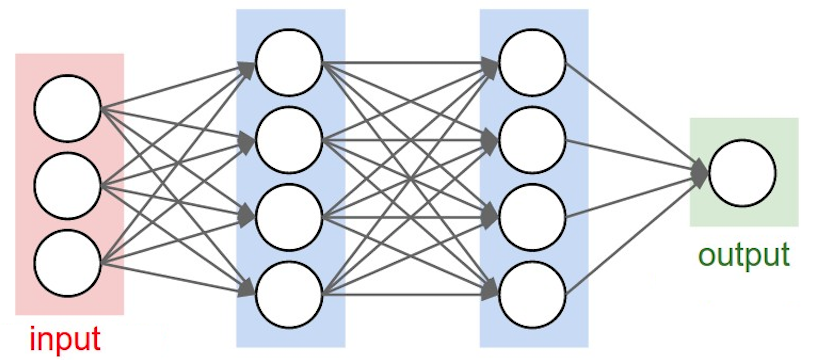

### Create Final model with full data 

In [82]:
X = X.astype('float32')
y = y.astype('float32')

In [83]:
model = Sequential()

model.add(Bidirectional(LSTM(units=128, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [84]:
model.fit(X, y, 
          epochs=20, 
          batch_size=32,         
         )

Epoch 1/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - loss: 0.2016
Epoch 2/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - loss: 0.0370
Epoch 3/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - loss: 0.0233
Epoch 4/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 0.0195
Epoch 5/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 0.0166
Epoch 6/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 0.0164
Epoch 7/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - loss: 0.0152
Epoch 8/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - loss: 0.0145
Epoch 9/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - loss: 0.0144
Epoch 10/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - loss: 0.0133
Epoch 11/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - loss: 0.0127
Epoch 12/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - loss: 0.0131
Epoch 13/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - loss: 0.0111
Epoch 14/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 0.0123
Epoch 15/20
543/543 ━━━━━━━━━

<Axes: >

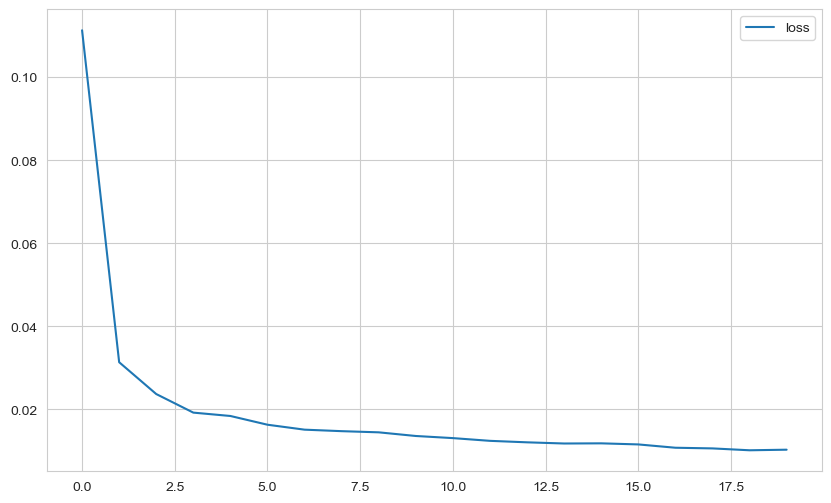

In [85]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### forecasting

`df_fake` represents a subset of the `val` dataset formed from the second column onward (`iloc[:, 1:]`). Here, all columns in the `val` dataset except the first column (which typically serves as an index column, such as time or date) are assigned to the `df_fake` variable.

This operation is commonly performed in time series datasets to separate the features that will be used for predictions from the target variable during data preparation. The expression `val.iloc[:, 1:]` retrieves all rows from the `val` dataset while selecting only the columns starting from the second column.

As a result, the `df_fake` dataset contains all columns of the `val` dataset except the first column.

The purpose of creating `df_fake` is based on the need to separately use the features in the `val` dataset and the target variable.

In time series data, features (other columns) typically accompany the target variable (here, `cnt`). During the training phase of the model, it is essential to separate the features (`df_fake`) from the target variable (`val.cnt`). This way, the model can be trained to predict the target variable using the features.

The `df_fake` dataset contains the features of the time series data for which predictions will be made. These features represent the input data the model will use to make predictions. After training the model, predictions can be made on the `df_fake` dataset, and the results can be evaluated.

In [86]:
df_fake = val.iloc[:,1:]
df_fake

t1    hum  wind_speed  is_holiday  is_weekend  \
timestamp                                                               
2017-01-03 00:00:00 -1.438  0.775      -0.381       0.000       0.000   
2017-01-03 01:00:00 -1.438  0.625      -0.476       0.000       0.000   
2017-01-03 02:00:00 -1.500  0.775      -0.381       0.000       0.000   
2017-01-03 03:00:00 -1.562  0.925      -0.190       0.000       0.000   
2017-01-03 04:00:00 -1.562  0.925      -0.095       0.000       0.000   
2017-01-03 05:00:00 -1.500  0.775      -0.095       0.000       0.000   
2017-01-03 06:00:00 -1.438  0.625       0.286       0.000       0.000   
2017-01-03 07:00:00 -1.438  0.625       0.381       0.000       0.000   
2017-01-03 08:00:00 -1.438  0.625       0.333       0.000       0.000   
2017-01-03 09:00:00 -1.250  0.325      -0.095       0.000       0.000   
2017-01-03 10:00:00 -1.188  0.325       0.476       0.000       0.000   
2017-01-03 11:00:00 -1.062  0.175       0.571       0.000       0.000   
2017-01-03 12:00:00 -0.938  0.075       0.571       0.000       0.000   
2017-01-03 13:00:00 -0.812 -0.175       0.762       0.000       0.000   
2017-01-03 14:00:00 -0.812 -0.050       0.667       0.000       0.000   
2017-01-03 15:00:00 -0.812 -0.175       1.143       0.000       0.000   
2017-01-03 16:00:00 -0.812 -0.175       1.048       0.000       0.000   
2017-01-03 17:00:00 -0.812 -0.050       0.571       0.000       0.000   
2017-01-03 18:00:00 -0.938  0.325       0.667       0.000       0.000   
2017-01-03 19:00:00 -0.938  0.325       0.381       0.000       0.000   
2017-01-03 20:00:00 -0.938  0.325       0.571       0.000       0.000   
2017-01-03 21:00:00 -0.875  0.200       0.857       0.000       0.000   
2017-01-03 22:00:00 -0.875  0.075       0.762       0.000       0.000   
2017-01-03 23:00:00 -0.938  0.075       0.667       0.000       0.000   

                     w_code_10.0  w_code_2.0  w_code_26.0  w_code_3.0  \
timestamp                                                               
2017-01-03 00:00:00        False       False        False       False   
2017-01-03 01:00:00        False       False        False       False   
2017-01-03 02:00:00        False       False        False       False   
2017-01-03 03:00:00        False       False        False       False   
2017-01-03 04:00:00        False       False        False       False   
2017-01-03 05:00:00        False       False        False        True   
2017-01-03 06:00:00        False       False        False       False   
2017-01-03 07:00:00        False       False        False       False   
2017-01-03 08:00:00        False       False        False        True   
2017-01-03 09:00:00        False       False        False       False   
2017-01-03 10:00:00        False       False        False       False   
2017-01-03 11:00:00        False       False        False       False   
2017-01-03 12:00:00        False       False        False        True   
2017-01-03 13:00:00        False       False        False       False   
2017-01-03 14:00:00        False       False        False        True   
2017-01-03 15:00:00        False       False        False       False   
2017-01-03 16:00:00        False       False        False       False   
2017-01-03 17:00:00        False       False        False        True   
2017-01-03 18:00:00        False        True        False       False   
2017-01-03 19:00:00        False       False        False        True   
2017-01-03 20:00:00        False       False        False       False   
2017-01-03 21:00:00        False       False        False       False   
2017-01-03 22:00:00        False       False        False       False   
2017-01-03 23:00:00        False        True        False       False   

                     w_code_4.0  w_code_7.0  
timestamp                                    
2017-01-03 00:00:00       False       False  
2017-01-03 01:00:00       False       False  
2017-01-03 02:00:00       False       Fals

This code snippet is used to obtain the actual values from the `cnt` column in the `val` dataset (represented as a NumPy array called `reel`) and reshape it.

The first line converts the `cnt` column in the `val` dataset into a NumPy array. Then, the `reshape` function is used to rearrange the shape of this array.

The `reshape((1, -1))` expression sets the number of rows to 1 and allows the number of columns to be determined automatically. Finally, the `[0]` expression is used to return the first row of the reshaped array.

This code snippet allows you to obtain a NumPy array containing the actual values from the `cnt` column of the `val` dataset, maintaining them in a single row.

In [87]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([-5.51553672e-01, -5.61440678e-01, -5.65677966e-01, -5.88983051e-01,
       -5.74858757e-01, -5.37429379e-01, -2.89548023e-01,  3.97598870e-01,
        1.45480226e+00,  3.62288136e-01, -1.29237288e-01, -1.46892655e-01,
       -1.34180791e-02,  2.40112994e-02, -5.57909605e-02,  7.06214689e-04,
        2.52118644e-01,  1.34039548e+00,  9.71751412e-01,  1.39830508e-01,
       -2.13983051e-01, -3.58050847e-01, -4.37853107e-01, -4.97881356e-01])

This code creates a loop to predict future values using an RNN model.

1. The `forecast` list is defined as empty, where the predictions will be stored.

2. The `periods` variable determines the number of periods to be predicted (assumed to be 24).

3. The `first_eval_batch` variable is created as the initial dataset used to start the predictions. This includes the last time steps of the completed model.

4. The `current_batch` variable represents the current dataset used for predictions, which is updated in each iteration of the loop. Initially, it starts with the value of `first_eval_batch`.

5. The `features` variable adjusts the shape of the features used for predictions (`df_fake`).

6. The loop iterates for the specified `periods` count. In each step:
   - The `current_pred` variable obtains the prediction for the next time step by making predictions on the current dataset (`current_batch`).
   - The prediction is appended to the `forecast` list.
   - The `new` variable represents a new data point, created by combining the features (from `df_fake`) containing the predicted value and the actual value (from `reel`).
   - The `new` data is added to the `current_batch`, and the first value is removed to update the dataset.

7. Once the loop is completed, the `forecast` list contains the predicted values for the specified number of periods in the future.

This code snippet demonstrates how to predict future values based on valid data using a trained RNN model and shows how predictions are updated in each step.

In [89]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
current_batch = current_batch.astype('float32')

features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [90]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: 0.9507718332153612 
mae: 0.0772949532235634 
mse: 0.01612444368772594 
rmse: 0.1269820604956698


In [91]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[  78.00769 ,   46.78241 ,   70.503174,   52.67224 ,  -29.802185,
          40.893555,  301.3888  , 1303.5852  , 2477.7017  , 1516.7587  ,
         621.67896 ,  587.5935  ,  799.5425  ,  775.70026 ,  775.89465 ,
         731.5049  , 1031.1971  , 2085.149   , 2285.745   , 1028.9718  ,
         504.8681  ,  244.65033 ,  117.9469  ,    3.437439]],
      dtype=float32)

In [92]:
forecast_index = pd.date_range(start = '2017-01-03 00:00:00', periods = periods, freq = 'H')

In [93]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

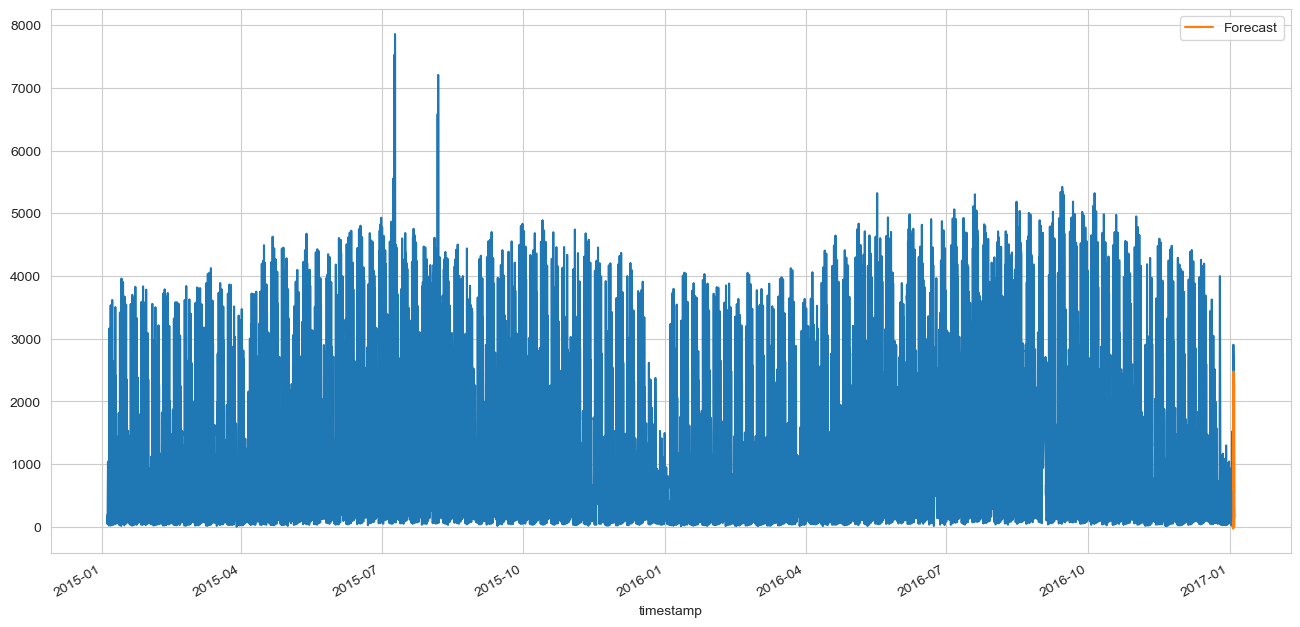

In [94]:
ax = df_raw["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(17167.0, 17169.958333333332)

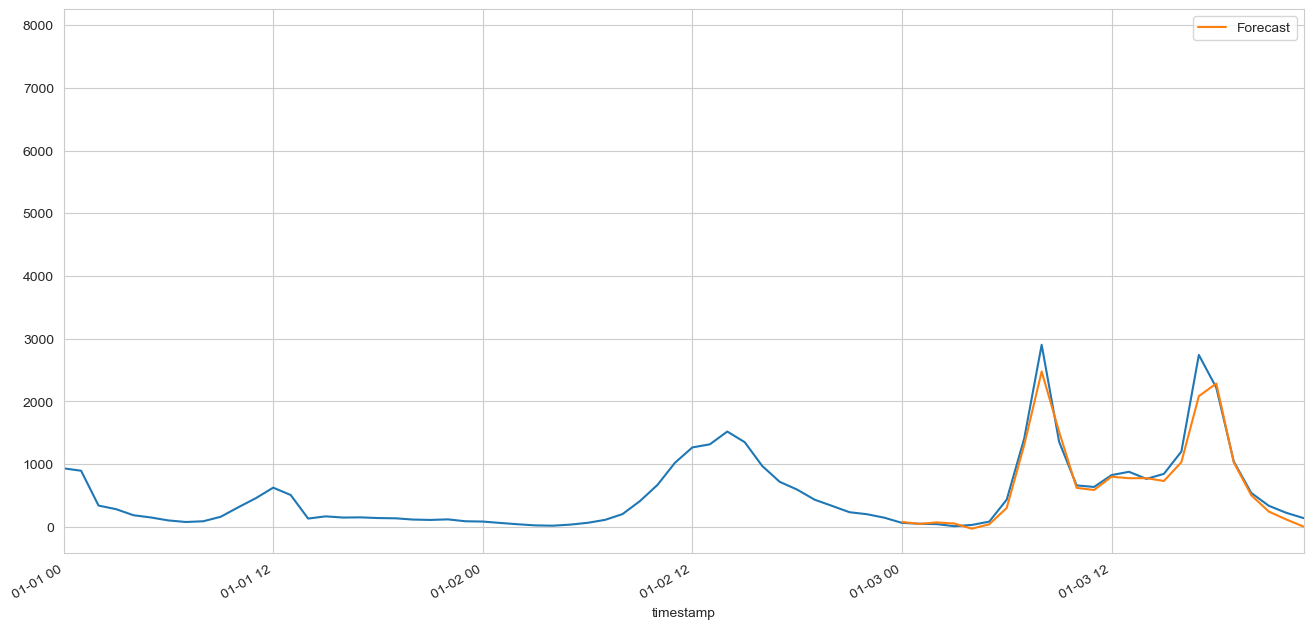

In [95]:
ax = df_raw["cnt"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2017-01-01 00:00:00', '2017-01-03 23:00:00')

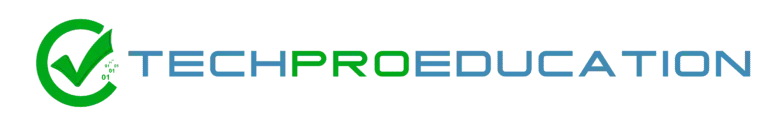